# `hw1`: Exploration of solar power data and weather data

In [1]:
# Fill in this cell with your personal details:
# - Name: Mvomo Eto Wilfried
# - Student ID: s226625
# - Email: Wilfried.MvomoEto@student.uliege.be

Deadline: **Monday, November 6, 11:59 PM**.
- Submit your completed notebook on your personal Github repository created when accepting the assignment.
- All cells must be executable and their outputs should not be erased before submission.
- Homeworks are carried out *individually*.

---

In this homework, you will have to load, clean, and explore solar power and weather data collected on the Sart-Tilman campus of the University of Liège. The goal is to prepare the data and to perform some basic exploratory analysis. The same dataset will be used in the next homeworks, so it is important to understand the data and to prepare it properly.

The `data/solar.csv` file contains solar power production data collected for the year 2022 from the photovoltaic installation located on the parking lots B and C of the Sart-Tilman campus.  

The `data/weather/*.tsv` files contain forecast data produced by the laboratory of climatology from the university. The data is provided in the form of tab-separated files, with the following columns:

- CD = low clouds (0 to 1)
- CM = medium clouds (0 to 1)
- CU = high clouds (0 to 1)
- PREC = precipitation (mm / 15 min)
- RH2m = relative humidity (%)
- SNOW = snow height (mm)
- ST = Surface Temperature (°C)
- SWD = Global Horizontal Irradiance (W/m2)
- SWDtop = Total Solar Irradiance at the top of the atmosphere (W/m2)
- TT2M = temperature 2 meters above the ground (°C)
- WS100m = Wind speed at 100m from the ground (m/s)
- WS10m = Wind speed at 10m from the ground (m/s)

# Exercices

- Solve the exercises below by making the best use of the API offered in numpy, pandas or matplotlib.
- For plots, feel free to use `matplotlib`, `seaborn` or `pandas` built-in plotting functions.
- Follow the data visualization principles as best as possible to make your plots effective and readable.
- For each exercise, add Markdown cells to explain what you are doing and to discuss your results.

<div class="alert alert-success">
    
**Exercise**. Load the data from `data/solar.csv` and `data/weather/*.tsv` in two dataframes. For the weather data, files are named according to the day of the forecast, which is performed at midnight for the next few days, with a resolution of 15 minutes. For each day, only use the forecast made for the 24 hours to come. For both dataframes, use the datetime as index, sort the rows according to this index, rename and drop columns if needed. Finally, merge the two datasets by matching the datetimes.
    
</div>

<div class="alert alert-danger">

Beware that the timezone used in `solar.csv` is **CEST** (with daylight saving time) and in `data/weater/**.tsv` is **UTC**. You can use the method `pandas.DatetimeIndex.tz_localize` to specify the timezone of a datetime series and `pandas.DatetimeIndex.tz_convert` to convert it to another timezone.

</div>

In [2]:
from google.colab import drive
import pandas as pd
import seaborn as sns
import numpy as np
import jax.numpy as jnp
import jax
import matplotlib.pyplot as plt
import calendar

drive.mount('/content/drive')

# Create empty array
data_frames = []

# Fetching all the files holding the data with extension ".tsv"
for year in range(2022, 2023):
    for month in range(1, 13):
        for day in range(1, 32):
           # Build the file name in the format 'YYYYMMDD.tsv'.
            file_name = f'{year}{month:02d}{day:02d}.tsv'

            try:
                df = pd.read_csv(f'/content/drive/MyDrive/data/weather/{file_name}', sep='\s+')
                data_frames.append(df)
            except FileNotFoundError:
                pass

weather_data = pd.concat(data_frames, ignore_index=True)

Mounted at /content/drive


To obtain a forecast for the following day, you need to calculate the average of the weather variables, by using the data collected the previous day. Each line of the table will therefore correspond to the average values of the variables for the previous day.
The variables linked to power present the values of the power produced at each 5 minute interval, so we reason as before with the variables linked to weather.
As for the energy-related variables, we consider only the value obtained at 23:55 for each of the days. These variables show how energy levels change over the course of a day.

In [3]:
weather_data.head(3)

,YYYY,MM,DD,HH,MIN,SWD,SWDtop,CU,CM,CD,TT2M,ST,RH2m,WS10m,WS100m,PREC,SNOW
0,2022.0,1.0,1.0,0.0,15.0,0.0,0.0,0.0,0.0,0.0,8.38,8.38,93.34,3.46,9.10,0.0,0.0
1,2022.0,1.0,1.0,0.0,30.0,0.0,0.0,0.0,0.0,0.0,8.52,8.52,92.18,3.81,9.52,0.0,0.0
2,2022.0,1.0,1.0,0.0,45.0,0.0,0.0,0.0,0.0,0.0,8.66,8.66,90.91,4.15,9.66,0.0,0.0


In [4]:
# The data set weather_data holds also the observastions until 10/01/2023
weather_data.tail(3)

,YYYY,MM,DD,HH,MIN,SWD,SWDtop,CU,CM,CD,TT2M,ST,RH2m,WS10m,WS100m,PREC,SNOW
335997,2023.0,1.0,9.0,23.0,30.0,0.0,0.0,1.0,1.0,1.0,6.71,6.71,95.43,10.23,19.25,0.25,0.0
335998,2023.0,1.0,9.0,23.0,45.0,0.0,0.0,1.0,1.0,1.0,6.86,6.86,95.11,10.11,19.03,0.20,0.0
335999,2023.0,1.0,10.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,7.00,7.00,94.91,9.96,18.76,0.16,0.0


In [5]:
print(weather_data.shape)
weather_data.info()

(336000, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336000 entries, 0 to 335999
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   YYYY    336000 non-null  float64
 1   MM      336000 non-null  float64
 2   DD      336000 non-null  float64
 3   HH      336000 non-null  float64
 4   MIN     336000 non-null  float64
 5   SWD     336000 non-null  float64
 6   SWDtop  336000 non-null  float64
 7   CU      336000 non-null  float64
 8   CM      336000 non-null  float64
 9   CD      336000 non-null  float64
 10  TT2M    336000 non-null  float64
 11  ST      336000 non-null  float64
 12  RH2m    336000 non-null  float64
 13  WS10m   336000 non-null  float64
 14  WS100m  336000 non-null  float64
 15  PREC    336000 non-null  float64
 16  SNOW    336000 non-null  float64
dtypes: float64(17)
memory usage: 43.6 MB


In [6]:
solar_data = pd.read_csv('/content/drive/MyDrive/data/solar.csv', sep=';', quotechar='"')
solar_data.iloc[140:145]

,id,DateTime,Power_1,Power_2,Power_3,Power_4,Power_5,Power_6,Power_7,Power_8,Power_Total,Energy_1,Energy_2,Energy_3,Energy_4,Energy_5,Energy_6,Energy_7,Energy_8,Energy_Total
140,577161,2022-01-01 12:45:00,31084,31552,19307,18998,11357,11282,11395,11317,146292,429307178,420401490,388860659,401849677,155324334,156472605,154503243,155930821,2262650007
141,577162,2022-01-01 12:50:00,27568,28032,17301,16282,10042,9973,10051,9981,129230,429309482,420403794,388862067,401851021,155325230,156473517,154504043,155931733,2262660887
142,577163,2022-01-01 12:55:00,27988,28465,17198,15771,10088,10024,10109,10053,129696,429311818,420406194,388863507,401852333,155326030,156474317,154504843,155932517,2262671559
143,577164,2022-01-01 13:00:00,25821,26222,16074,14301,9325,9270,9339,9265,119617,429313962,420408369,388864851,401853517,155326830,156475117,154505659,155933333,2262681638
144,577165,2022-01-01 13:05:00,22750,23087,14545,12618,8235,8179,8260,8194,105868,429315850,420410257,388866035,401854573,155327534,156475725,154506347,155934021,2262690342


In the next the startegy to recover all the data into a solely data frame as follows:

1. for the features held in the weather data set, I will compute the mean of data daily collected and assigned it to the given date;
2. for the features held in the solar data set, particularly for the features related to the power (e.g: Power_1), I will apply the same way as in line 1. However, regarding its features linked to the energy (e.g : Energy_1), I will
assign the last value gotten from the day to this given date.



In [7]:
power_columns = ['Power_1', 'Power_2', 'Power_3', 'Power_4', 'Power_5', 'Power_6', 'Power_7', 'Power_8']
solar_data[power_columns] = solar_data[power_columns].astype(float)

In [8]:
print(solar_data.shape)
solar_data.info()

(90193, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90193 entries, 0 to 90192
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            90193 non-null  int64  
 1   DateTime      90193 non-null  object 
 2   Power_1       90193 non-null  float64
 3   Power_2       90193 non-null  float64
 4   Power_3       90193 non-null  float64
 5   Power_4       90193 non-null  float64
 6   Power_5       90193 non-null  float64
 7   Power_6       90193 non-null  float64
 8   Power_7       90193 non-null  float64
 9   Power_8       90193 non-null  float64
 10  Power_Total   90193 non-null  int64  
 11  Energy_1      90193 non-null  object 
 12  Energy_2      90193 non-null  object 
 13  Energy_3      90193 non-null  object 
 14  Energy_4      90193 non-null  object 
 15  Energy_5      90193 non-null  object 
 16  Energy_6      90193 non-null  object 
 17  Energy_7      90193 non-null  object 
 18  Energy_8      

In [9]:
solar_data['DateTime'] = pd.to_datetime(solar_data['DateTime'])
solar_data.set_index('DateTime', inplace=True)

In [10]:
solar_data.tail(3)

,id,Power_1,Power_2,Power_3,Power_4,Power_5,Power_6,Power_7,Power_8,Power_Total,Energy_1,Energy_2,Energy_3,Energy_4,Energy_5,Energy_6,Energy_7,Energy_8,Energy_Total
DateTime,,,,,,,,,,,,,,,,,,,
2022-12-31 22:20:00,667211,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,\N,\N,\N,\N,\N,\N,\N,\N,\N
2022-12-31 22:25:00,667212,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,\N,\N,\N,\N,\N,\N,\N,\N,\N
2022-12-31 22:30:00,667213,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,\N,\N,\N,\N,\N,\N,\N,\N,\N


In [11]:
# Convert the date and time columns to datetime format
weather_data['DateTime'] = pd.to_datetime(weather_data[['YYYY', 'MM', 'DD', 'HH', 'MIN']].rename(columns={'YYYY':'year', 'MM':'month', 'DD':'day', 'HH':'hour', 'MIN':'minute'}))

# Set the DateTime column as the index
weather_data.set_index('DateTime', inplace=True)

# Set the timezone to UTC and then convert it to Europe/Brussels
weather_data = weather_data.tz_localize('UTC').tz_convert('Europe/Brussels')

In [12]:
columns_to_drop = ['YYYY', 'MM', 'DD', 'HH', 'MIN','SWDtop']
weather_data.drop(columns=columns_to_drop, inplace=True)

In [13]:
weather_data.tail(2)

,SWD,CU,CM,CD,TT2M,ST,RH2m,WS10m,WS100m,PREC,SNOW
DateTime,,,,,,,,,,,
2023-01-10 00:45:00+01:00,0.0,1.0,1.0,1.0,6.86,6.86,95.11,10.11,19.03,0.20,0.0
2023-01-10 01:00:00+01:00,0.0,1.0,1.0,1.0,7.00,7.00,94.91,9.96,18.76,0.16,0.0


In [14]:
weather_data_resampled = weather_data.resample('H').mean()
weather_data_resampled.reset_index(inplace=True)
weather_data_resampled['Date'] = weather_data_resampled['DateTime'].dt.date

# Group the data by the 'Date' column and calculate the mean for each day
merged_weather_data = weather_data_resampled.groupby('Date').mean()
merged_weather_data.reset_index(inplace=True)
merged_weather_data.tail(3)

<ipython-input-14-8dddd7d9a388>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  merged_weather_data = weather_data_resampled.groupby('Date').mean()


,Date,SWD,CU,CM,CD,TT2M,ST,RH2m,WS10m,WS100m,PREC,SNOW
372,2023-01-08,27.339583,0.341215,0.157841,0.305237,1.018304,1.018304,92.299178,4.569560,8.872564,0.005723,0.000000
373,2023-01-09,18.523229,0.580208,0.624583,0.866302,3.377552,3.377552,95.723083,5.375062,10.029885,0.091031,0.259479
374,2023-01-10,0.000000,1.000000,1.000000,1.000000,6.816250,6.816250,95.245000,10.112500,19.032500,0.217500,0.000000


In [15]:
columns_to_drop = ['Power_Total', 'Energy_Total']
solar_data.drop(columns=columns_to_drop, inplace=True)

In [16]:
# Resample solar_data to 5-minute intervals and calculate the mean
solar_data_resampled = solar_data.resample('5T').mean()

# Reset the index to have a regular DataFrame
solar_data_resampled.reset_index(inplace=True)

# Extract the date from the DateTime column
solar_data_resampled['Date'] = solar_data_resampled['DateTime'].dt.date
solar_data_power = solar_data_resampled.groupby('Date').mean()

# Reset the index to have 'Date' as a column again
solar_data_power.reset_index(inplace=True)
solar_data_power.drop(columns='id', inplace=True)
solar_data_power.head()

<ipython-input-16-22f34897ffd7>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  solar_data_resampled = solar_data.resample('5T').mean()
<ipython-input-16-22f34897ffd7>:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  solar_data_power = solar_data_resampled.groupby('Date').mean()


,Date,Power_1,Power_2,Power_3,Power_4,Power_5,Power_6,Power_7,Power_8
0,2022-01-01,4151.891473,4240.806202,3297.674419,3058.170543,1556.089147,1567.763566,1571.100775,1561.620155
1,2022-01-02,1466.756757,1492.602317,1307.339768,1294.100386,593.185328,594.872587,594.088803,594.980695
2,2022-01-03,1000.484496,1009.503876,996.457364,934.329457,413.310078,414.864341,414.054264,415.503876
3,2022-01-04,966.271318,975.344961,959.647287,900.000000,399.220930,401.166667,399.988372,401.236434
4,2022-01-05,1891.627907,1893.581395,1729.100775,1605.325581,746.085271,748.077519,737.674419,714.337209


In [17]:
solar_data_resampled = solar_data.resample('5T').last()
solar_data_resampled.reset_index(inplace=True)
solar_data_resampled['Date'] = solar_data_resampled['DateTime'].dt.date

# Group the data by date and keep the last value for each date
solar_data_energy = solar_data_resampled.groupby('Date').last()
solar_data_energy.reset_index(inplace=True)
solar_data_energy.drop(columns='id', inplace=True)
solar_data_energy.head()
solar_data_energy.drop(columns=['DateTime','Power_1', 'Power_2', 'Power_3', 'Power_4', 'Power_5', 'Power_6', 'Power_7', 'Power_8'], inplace=True)

In [18]:
solar_data_energy.head(3)

,Date,Energy_1,Energy_2,Energy_3,Energy_4,Energy_5,Energy_6,Energy_7,Energy_8
0,2022-01-01,\N,\N,\N,\N,\N,\N,\N,\N
1,2022-01-02,\N,\N,\N,\N,\N,\N,\N,\N
2,2022-01-03,\N,\N,\N,\N,\N,\N,\N,\N


In [19]:
merged_solar_data = solar_data_power.merge(solar_data_energy, on='Date')
merged_solar_data.set_index('Date', inplace=True)
merged_weather_data.set_index('Date', inplace=True)
merged_solar_data.head()

,Power_1,Power_2,Power_3,Power_4,Power_5,Power_6,Power_7,Power_8,Energy_1,Energy_2,Energy_3,Energy_4,Energy_5,Energy_6,Energy_7,Energy_8
Date,,,,,,,,,,,,,,,,
2022-01-01,4151.891473,4240.806202,3297.674419,3058.170543,1556.089147,1567.763566,1571.100775,1561.620155,\N,\N,\N,\N,\N,\N,\N,\N
2022-01-02,1466.756757,1492.602317,1307.339768,1294.100386,593.185328,594.872587,594.088803,594.980695,\N,\N,\N,\N,\N,\N,\N,\N
2022-01-03,1000.484496,1009.503876,996.457364,934.329457,413.310078,414.864341,414.054264,415.503876,\N,\N,\N,\N,\N,\N,\N,\N
2022-01-04,966.271318,975.344961,959.647287,900.000000,399.220930,401.166667,399.988372,401.236434,\N,\N,\N,\N,\N,\N,\N,\N
2022-01-05,1891.627907,1893.581395,1729.100775,1605.325581,746.085271,748.077519,737.674419,714.337209,\N,\N,\N,\N,\N,\N,\N,\N


In [20]:
merged_solar_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 2022-01-01 to 2022-12-31
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Power_1   363 non-null    float64
 1   Power_2   363 non-null    float64
 2   Power_3   363 non-null    float64
 3   Power_4   363 non-null    float64
 4   Power_5   363 non-null    float64
 5   Power_6   363 non-null    float64
 6   Power_7   363 non-null    float64
 7   Power_8   363 non-null    float64
 8   Energy_1  363 non-null    object 
 9   Energy_2  363 non-null    object 
 10  Energy_3  363 non-null    object 
 11  Energy_4  363 non-null    object 
 12  Energy_5  363 non-null    object 
 13  Energy_6  363 non-null    object 
 14  Energy_7  363 non-null    object 
 15  Energy_8  363 non-null    object 
dtypes: float64(8), object(8)
memory usage: 48.5+ KB


In [21]:
merged_weather_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 375 entries, 2022-01-01 to 2023-01-10
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SWD     375 non-null    float64
 1   CU      375 non-null    float64
 2   CM      375 non-null    float64
 3   CD      375 non-null    float64
 4   TT2M    375 non-null    float64
 5   ST      375 non-null    float64
 6   RH2m    375 non-null    float64
 7   WS10m   375 non-null    float64
 8   WS100m  375 non-null    float64
 9   PREC    375 non-null    float64
 10  SNOW    375 non-null    float64
dtypes: float64(11)
memory usage: 35.2+ KB


In [22]:
merged_weather_data.head(3)

,SWD,CU,CM,CD,TT2M,ST,RH2m,WS10m,WS100m,PREC,SNOW
Date,,,,,,,,,,,
2022-01-01,33.577283,0.615761,0.000000,0.000217,9.166848,9.166848,93.654058,3.712899,7.907138,0.000000,0.0
2022-01-02,39.669427,0.257939,0.231042,0.226927,9.365387,9.365387,85.052686,4.975685,9.686362,0.010938,0.0
2022-01-03,17.929132,0.551155,0.536995,0.705750,8.034220,8.034220,92.823865,4.882498,9.130120,0.079353,0.0


In [23]:
merged_weather_data.tail(3)

,SWD,CU,CM,CD,TT2M,ST,RH2m,WS10m,WS100m,PREC,SNOW
Date,,,,,,,,,,,
2023-01-08,27.339583,0.341215,0.157841,0.305237,1.018304,1.018304,92.299178,4.569560,8.872564,0.005723,0.000000
2023-01-09,18.523229,0.580208,0.624583,0.866302,3.377552,3.377552,95.723083,5.375062,10.029885,0.091031,0.259479
2023-01-10,0.000000,1.000000,1.000000,1.000000,6.816250,6.816250,95.245000,10.112500,19.032500,0.217500,0.000000


In [24]:
merged_weather_data = merged_weather_data.iloc[:-10]    # drop the last rows holding the data from 01/01/2023 to 10/01/2023

In [25]:
merged_weather_data.tail(3)

,SWD,CU,CM,CD,TT2M,ST,RH2m,WS10m,WS100m,PREC,SNOW
Date,,,,,,,,,,,
2022-12-29,26.563771,0.281552,0.168031,0.504354,8.092406,8.092406,88.592958,5.211510,9.846885,0.028896,0.000000
2022-12-30,23.471010,0.433448,0.261229,0.365854,7.864198,7.864198,88.202833,5.663219,10.808437,0.019990,0.009146
2022-12-31,21.377698,0.460260,0.295281,0.453698,11.005344,11.005344,88.705062,5.980260,11.308385,0.050646,0.000000


In [26]:
merged_weather_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 2022-01-01 to 2022-12-31
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SWD     365 non-null    float64
 1   CU      365 non-null    float64
 2   CM      365 non-null    float64
 3   CD      365 non-null    float64
 4   TT2M    365 non-null    float64
 5   ST      365 non-null    float64
 6   RH2m    365 non-null    float64
 7   WS10m   365 non-null    float64
 8   WS100m  365 non-null    float64
 9   PREC    365 non-null    float64
 10  SNOW    365 non-null    float64
dtypes: float64(11)
memory usage: 34.2+ KB


In [27]:
# Merge the DataFrames based on their index 'Date'
merged_data = pd.merge(merged_weather_data, merged_solar_data, left_index=True, right_index=True)
merged_data.head(4)

,SWD,CU,CM,CD,TT2M,ST,RH2m,WS10m,WS100m,PREC,...,Power_7,Power_8,Energy_1,Energy_2,Energy_3,Energy_4,Energy_5,Energy_6,Energy_7,Energy_8
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-01,33.577283,0.615761,0.000000,0.000217,9.166848,9.166848,93.654058,3.712899,7.907138,0.000000,...,1571.100775,1561.620155,\N,\N,\N,\N,\N,\N,\N,\N
2022-01-02,39.669427,0.257939,0.231042,0.226927,9.365387,9.365387,85.052686,4.975685,9.686362,0.010938,...,594.088803,594.980695,\N,\N,\N,\N,\N,\N,\N,\N
2022-01-03,17.929132,0.551155,0.536995,0.705750,8.034220,8.034220,92.823865,4.882498,9.130120,0.079353,...,414.054264,415.503876,\N,\N,\N,\N,\N,\N,\N,\N
2022-01-04,8.459531,0.751875,0.739844,0.964948,5.881549,5.881549,97.302545,3.302458,6.359753,0.190102,...,399.988372,401.236434,\N,\N,\N,\N,\N,\N,\N,\N


In [28]:
merged_data.tail(3)

,SWD,CU,CM,CD,TT2M,ST,RH2m,WS10m,WS100m,PREC,...,Power_7,Power_8,Energy_1,Energy_2,Energy_3,Energy_4,Energy_5,Energy_6,Energy_7,Energy_8
Date,,,,,,,,,,,,,,,,,,,,,
2022-12-29,26.563771,0.281552,0.168031,0.504354,8.092406,8.092406,88.592958,5.211510,9.846885,0.028896,...,944.689922,936.484496,\N,\N,\N,\N,\N,\N,\N,\N
2022-12-30,23.471010,0.433448,0.261229,0.365854,7.864198,7.864198,88.202833,5.663219,10.808437,0.019990,...,342.143411,345.193798,\N,\N,\N,\N,\N,\N,\N,\N
2022-12-31,21.377698,0.460260,0.295281,0.453698,11.005344,11.005344,88.705062,5.980260,11.308385,0.050646,...,528.593023,539.019380,\N,\N,\N,\N,\N,\N,\N,\N


<div class="alert alert-success">
    
**Exercise**. Visualize the raw data. What do you observe?
    
</div>

One notices the presence of '\N' value in the column cells related to the features of the solar data set. That means there is attendence of missing values in the data set. Based on the bar plots and in the informations given below, the  features related to the power (e.g: Power_1), have only two missing values. Meanwhile the features related to the energy (e.g: Energy_1) have more than 200 missing values.
 In the next exercise, we will see how to deal this issue.

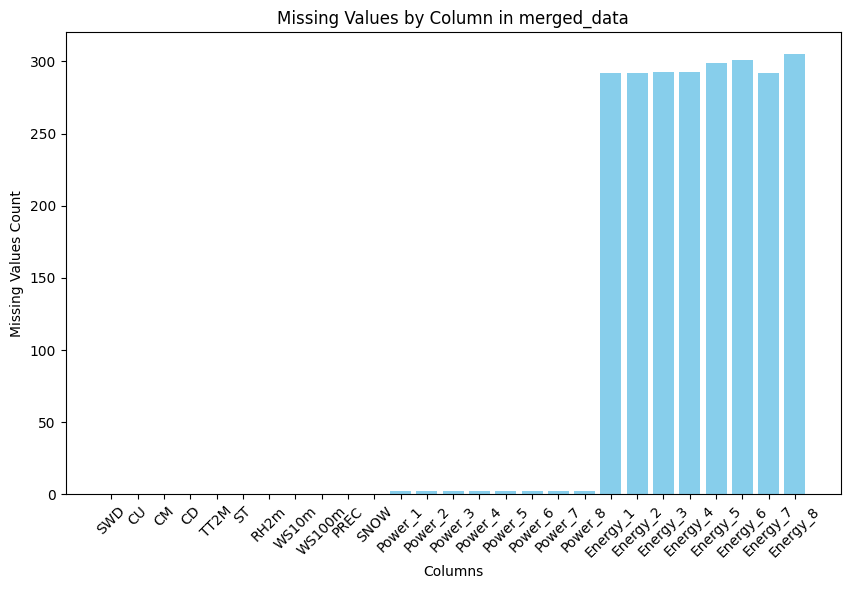

In [29]:
merged_data.replace('\\N', np.nan, inplace=True)
missing_values = merged_data.isnull().sum()
plt.figure(figsize=(10, 6))
plt.bar(missing_values.index, missing_values.values, color='skyblue')
plt.xlabel('Columns')
plt.ylabel('Missing Values Count')
plt.title('Missing Values by Column in merged_data')
plt.xticks(rotation=45)
plt.show()

Each of those columns hereabove mentioned hold two missing values depicted by the skyblue vertcal bars in the plot (mainly the solar variables).

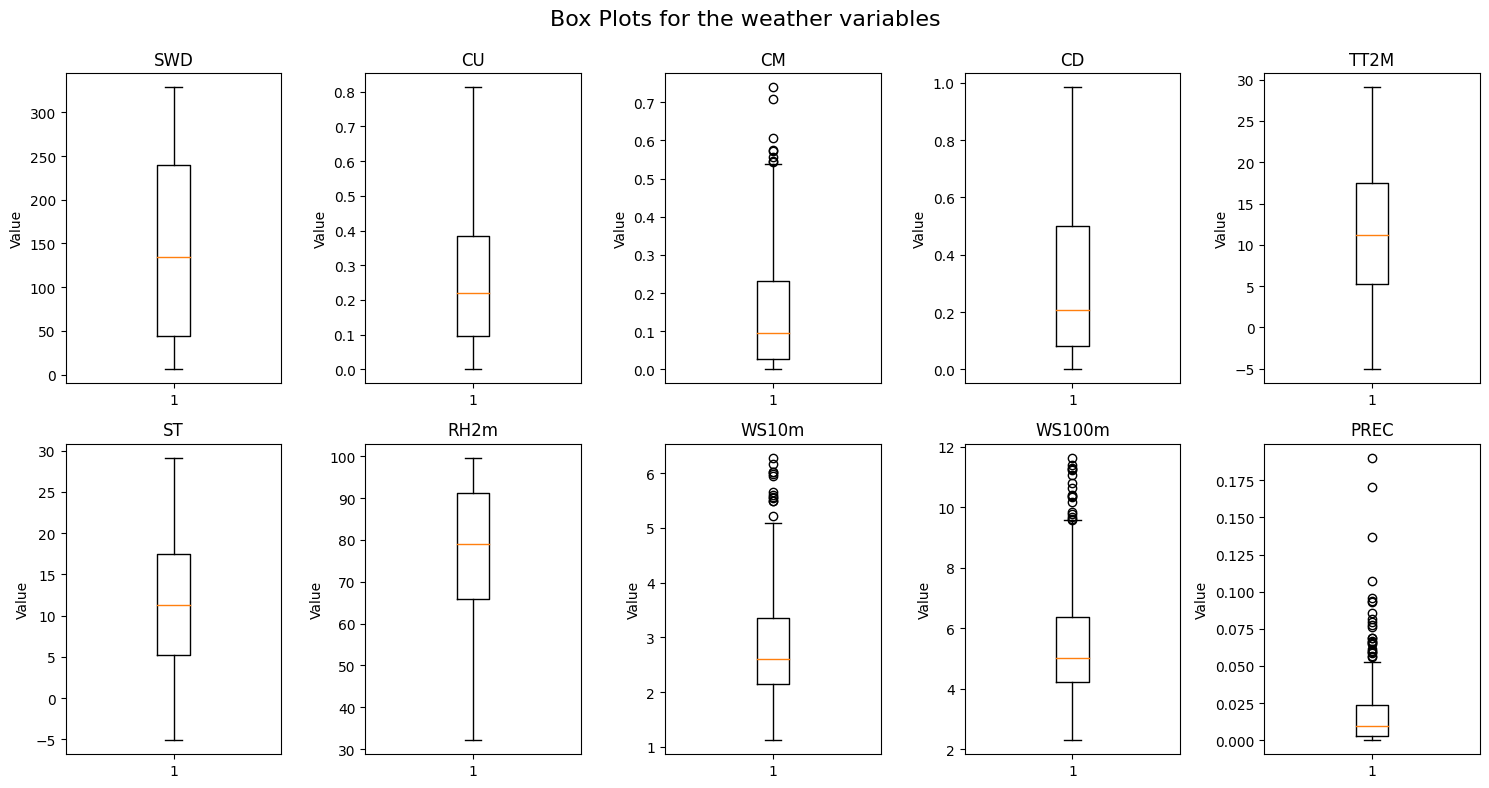

In [30]:
weather_columns = ['SWD','CU', 'CM', 'CD', 'TT2M', 'ST', 'RH2m', 'WS10m', 'WS100m', 'PREC']

# Create a 2x5 grid of subplots for box plots
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 8))
fig.suptitle('Box Plots for the weather variables', fontsize=16)

# Flatten the axes array for easy iteration
axes = axes.flatten()

for i, col in enumerate(weather_columns):
    ax = axes[i]
    ax.boxplot(merged_data[col])
    ax.set_title(col)
    ax.set_ylabel('Value')

plt.tight_layout()
plt.subplots_adjust(top=0.9)

plt.show()

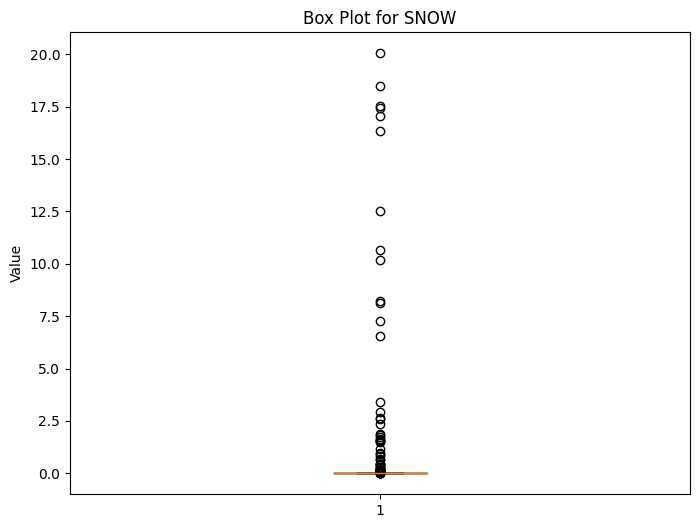

In [31]:
# Plot the 'SNOW' variable (flat variable)
plt.figure(figsize=(8, 6))
plt.boxplot(merged_data['SNOW'])
plt.title('Box Plot for SNOW')
plt.ylabel('Value')
plt.show()

The features related to the weather data set, do not spread out in the same manner. For instance, the F-spread of the RH2m feature seems to be around 25 but one of SNOW feature is 0.
Moreover, one sees the presence of observations in some variables which are above the upper extreme bar of the box plots. For example, we highligt them in CM , WS10m or PREC variable box plot. These observations are often considered as outliers (non-robust detection technique).

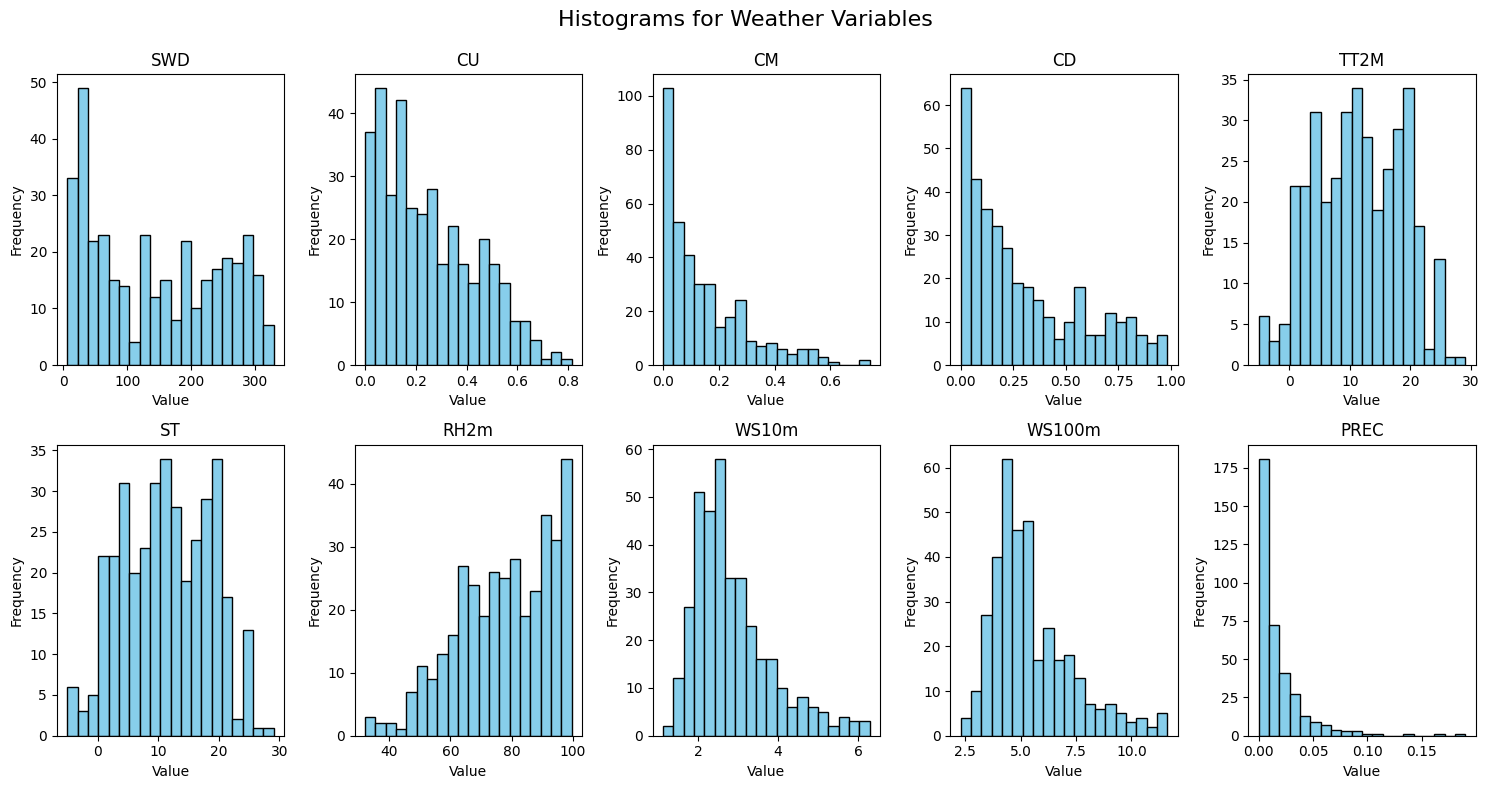

In [32]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 8))
fig.suptitle('Histograms for Weather Variables', fontsize=16)
axes = axes.flatten()

# Iterate over the weather columns and create histograms
for i, col in enumerate(weather_columns):
    ax = axes[i]
    ax.hist(merged_weather_data[col].dropna(), bins=20, color='skyblue', edgecolor='black')
    ax.set_title(col)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.subplots_adjust(top=0.9)

plt.show()

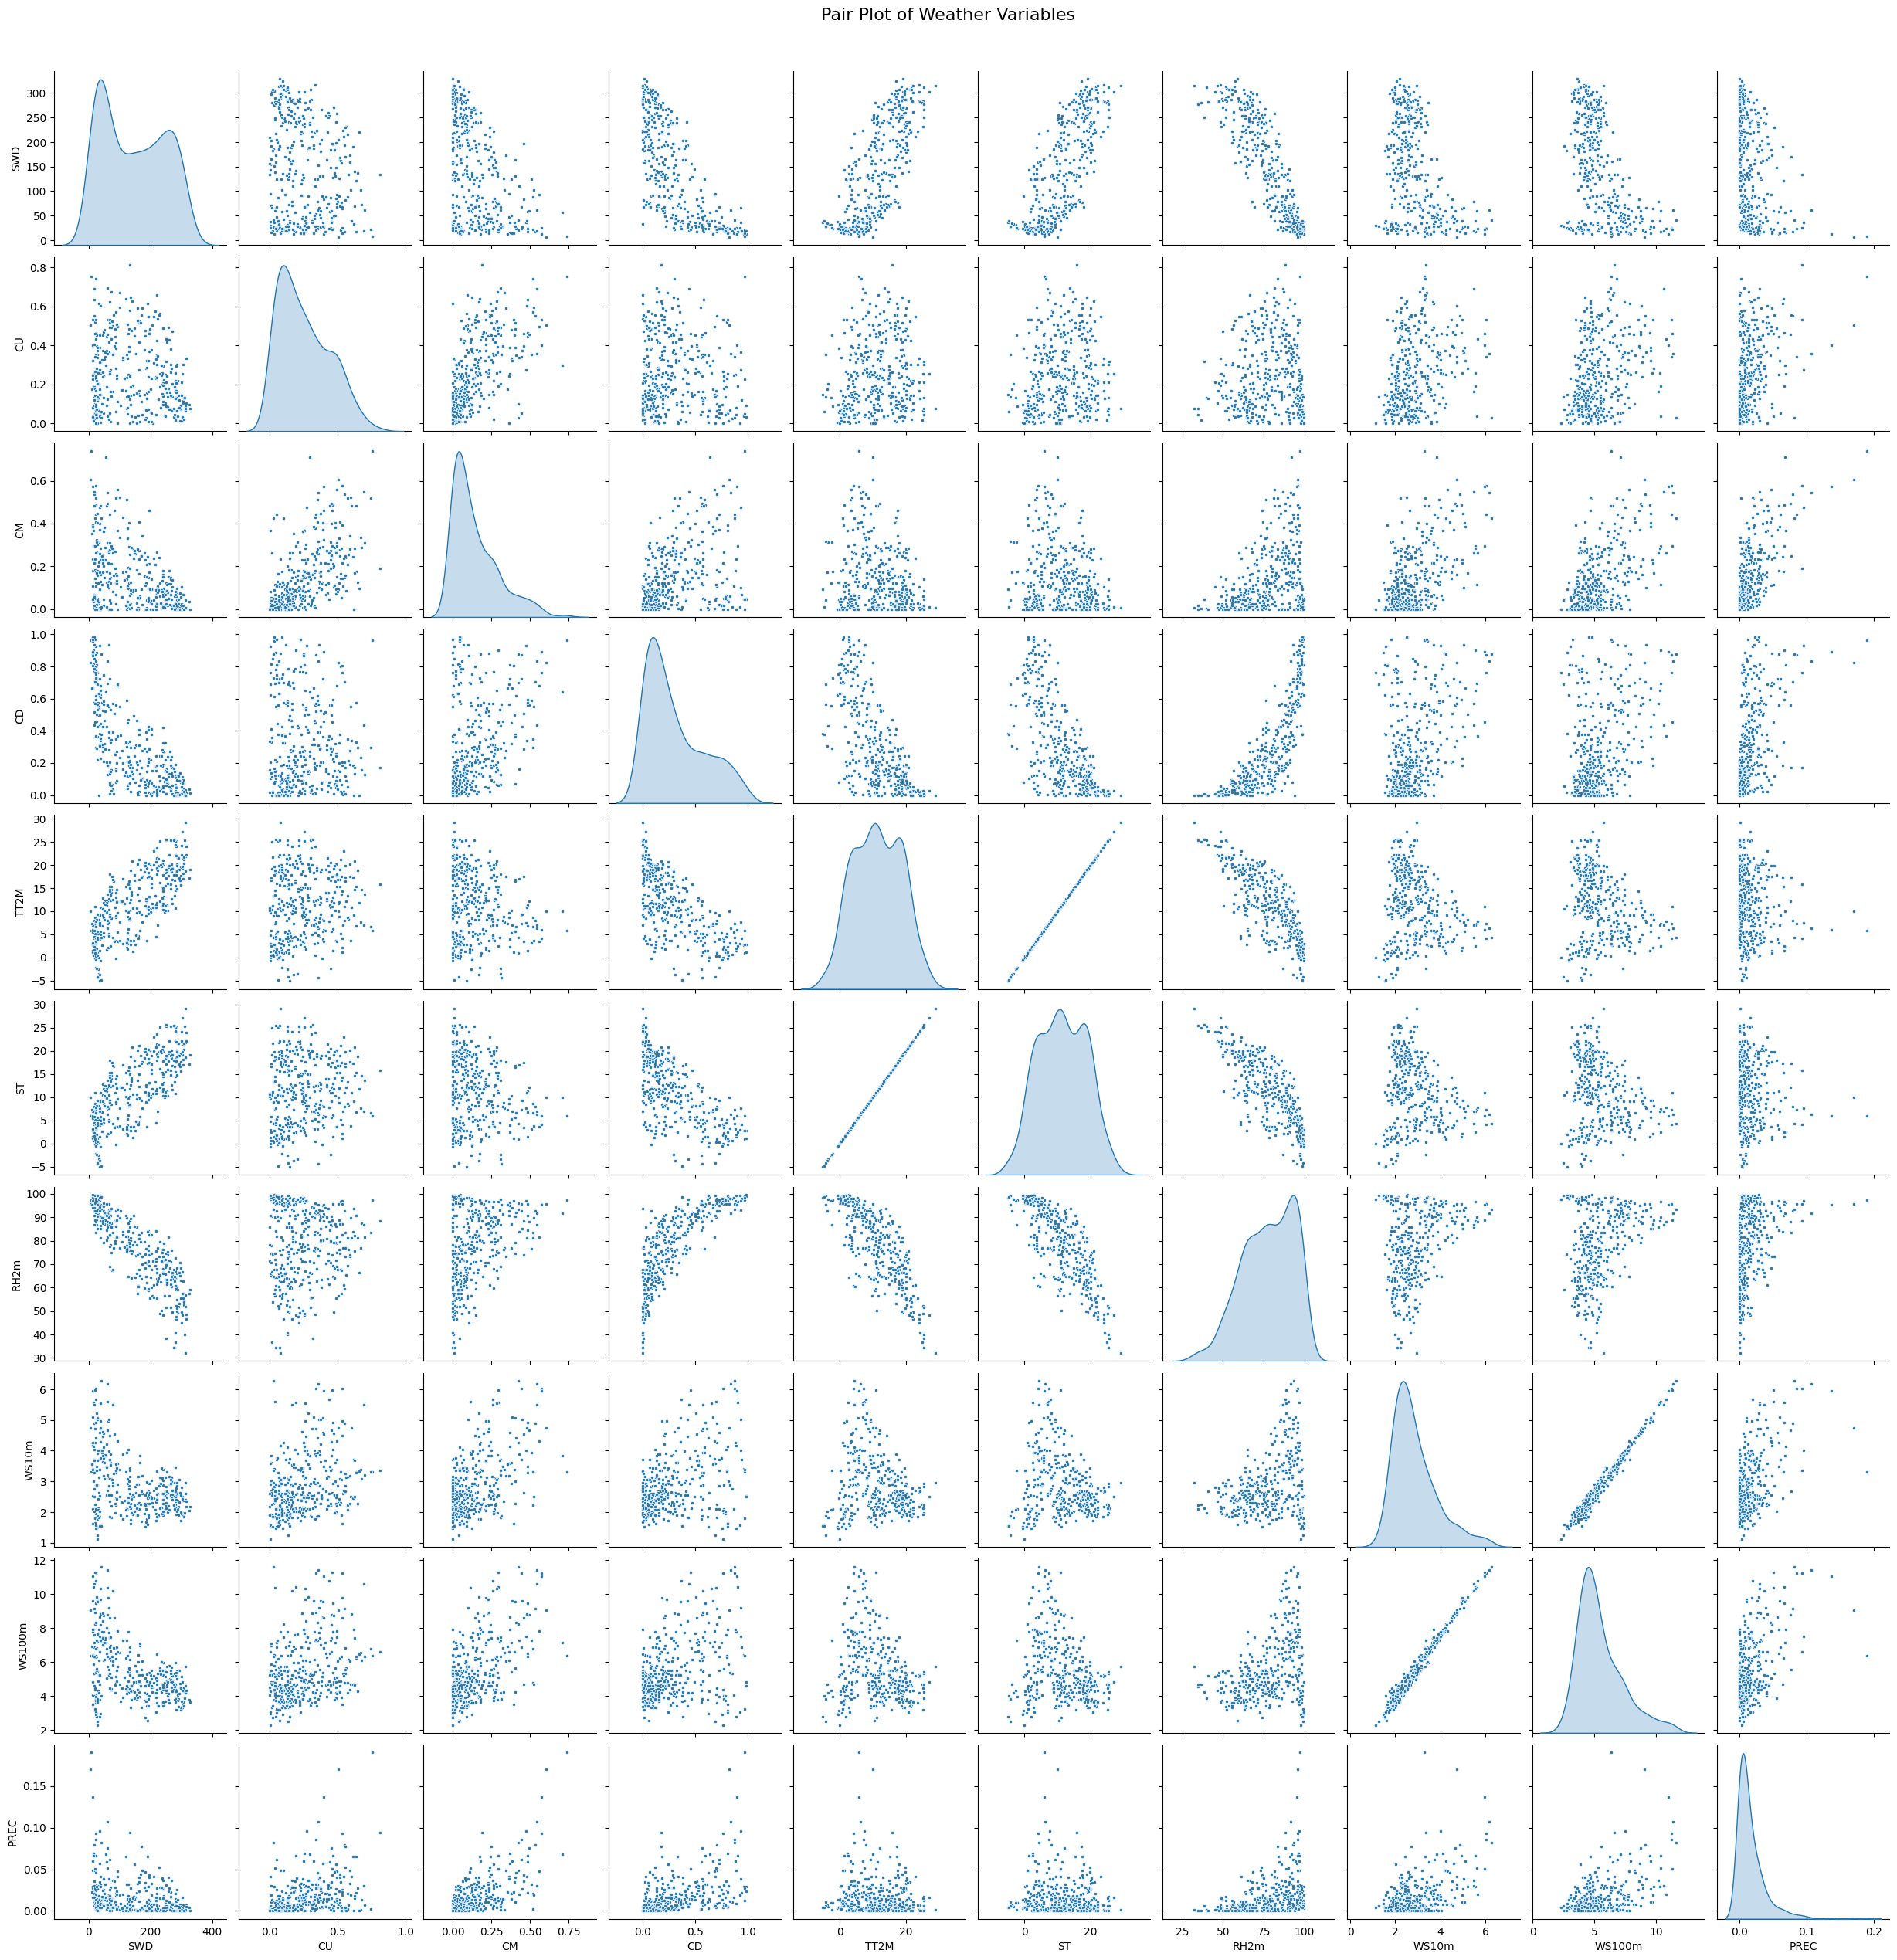

In [33]:
sns.pairplot(merged_data[weather_columns], diag_kind='kde', markers='.')
plt.suptitle('Pair Plot of Weather Variables', y=1.02, fontsize=16)
plt.show()

Through the histograms in the plot above, and the density functions located in the diagonal of the plot below, of the feature distributions, we are not able to recongnise a known law distribution. We can see that the data for the SNOW variable are flat, which means that there is no significant variation in the values of the  feature. This result was to be expected, because there was very little snow this year (it does not contribute to energy production).
The scatter matrix plot below, holds some scatter which are upward-sloping like a scatter between the TT2M and ST features, also WS10m and WS100m  features. That means when the value of a temperature 2 meters above the ground (°C) increases, the value of a surface temperature (°C) increases simultaneously. We reason in the same way with wind speed at 100m from the ground (m/s) and  wind speed at 100m from the ground (m/s) as expected. In fact, these features quantify the same information, but differ only in the distances they cover. This clearly reflects a redundancy in the information collected. The distributions of PREC and CM  features have their modes located in the range [0; 0.2].
The others scatter plots in the scatter matrix plot do not display a strong correlation among the variables.


<div class="alert alert-success">
    
**Exercise**. If necessary, filter the data to remove outliers or abnormal values. Explain your approach and rationale.

</div>

Wrangling missing values:
1.   We will replace a missing value in the features linked to the power by the mean of the given feature where it falls.
2.   Since there are several missing values for the variables related to an energy, and knowing that the values holding in their cells increase, one needs to build a linear model which fits with the given column cell values.




In [34]:
power_columns = ['Power_1', 'Power_2', 'Power_3', 'Power_4', 'Power_5', 'Power_6', 'Power_7','Power_8']
for column in power_columns:
    mean_value = merged_data[column].mean(skipna=True)
    merged_data[column].fillna(mean_value, inplace=True)

In [35]:
merged_data[['Energy_1', 'Energy_2', 'Energy_3', 'Energy_4', 'Energy_5', 'Energy_6', 'Energy_7', 'Energy_8']] = \
    merged_data[['Energy_1', 'Energy_2', 'Energy_3', 'Energy_4', 'Energy_5', 'Energy_6', 'Energy_7', 'Energy_8']].astype('float64')

merged_data['order'] = range(1,366)
order_values = merged_data['order']

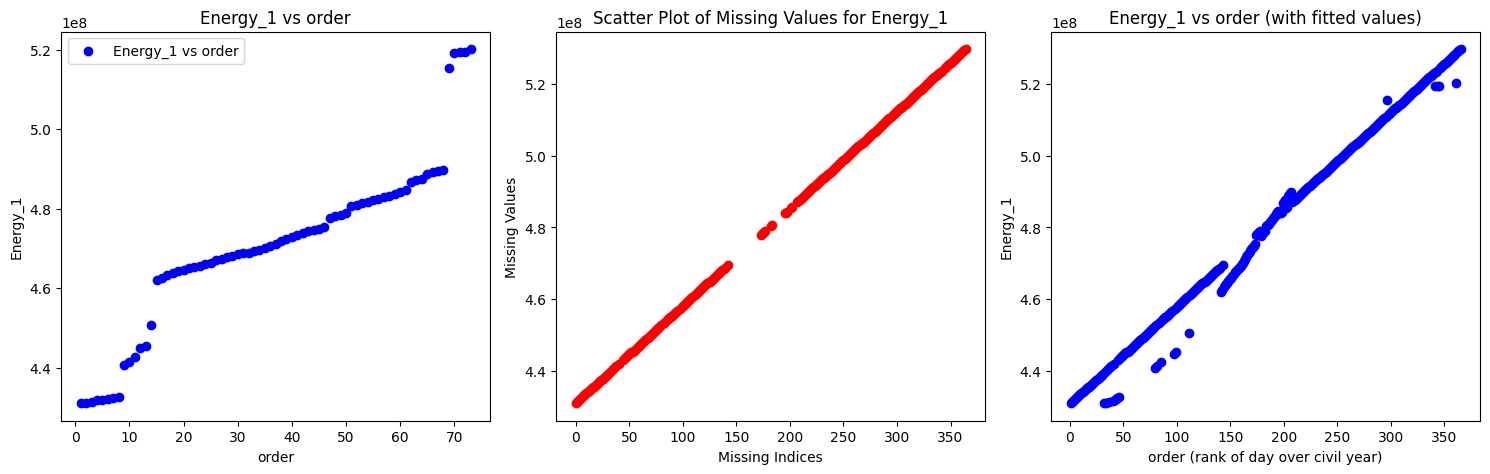

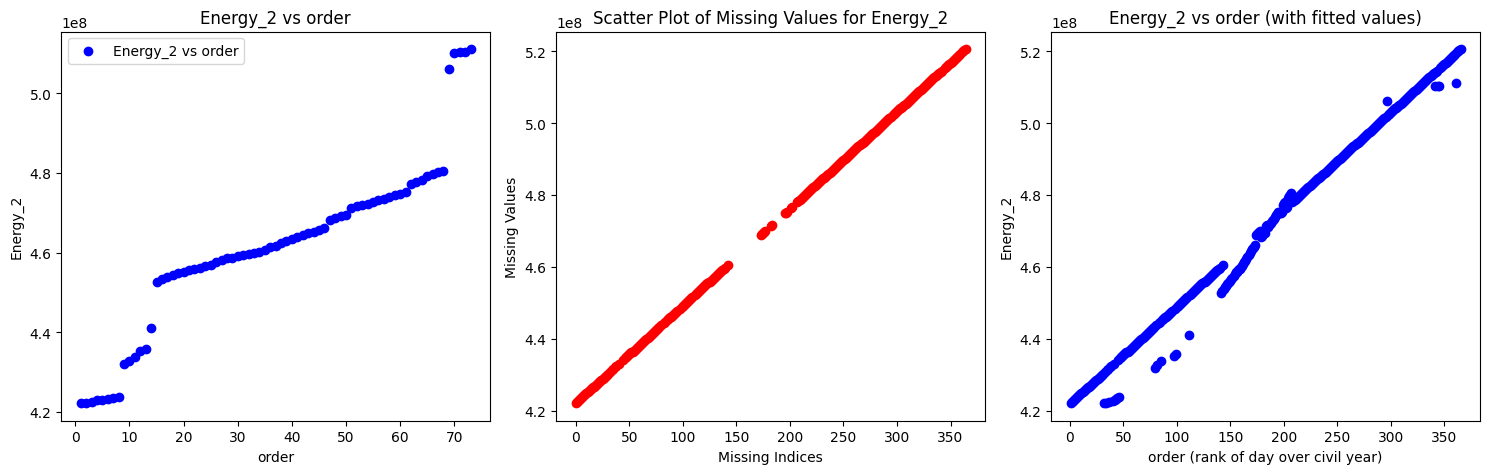

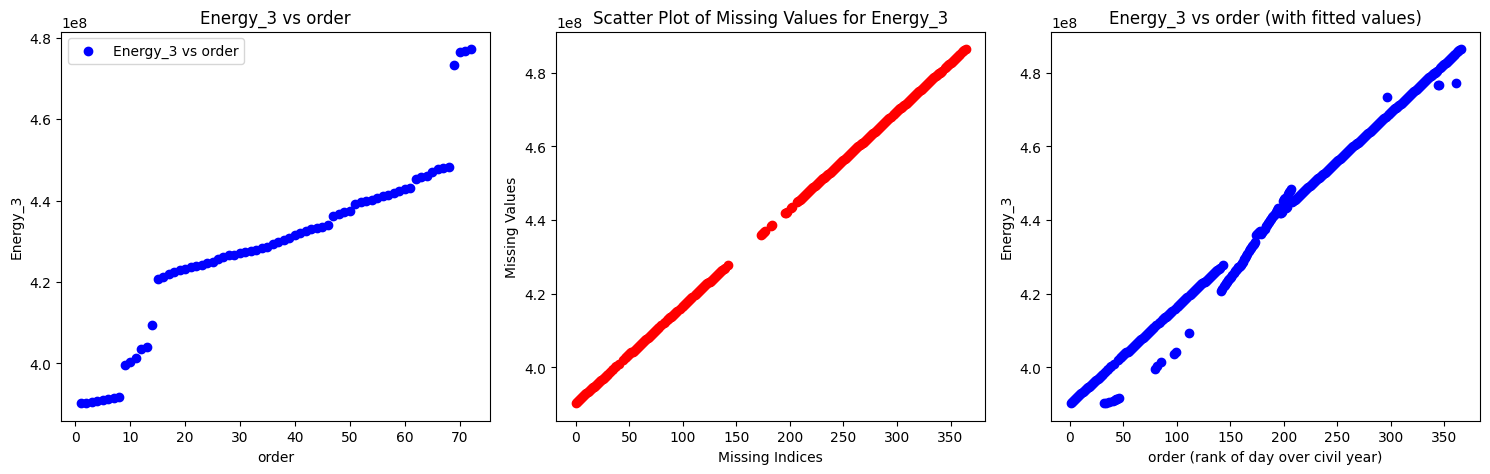

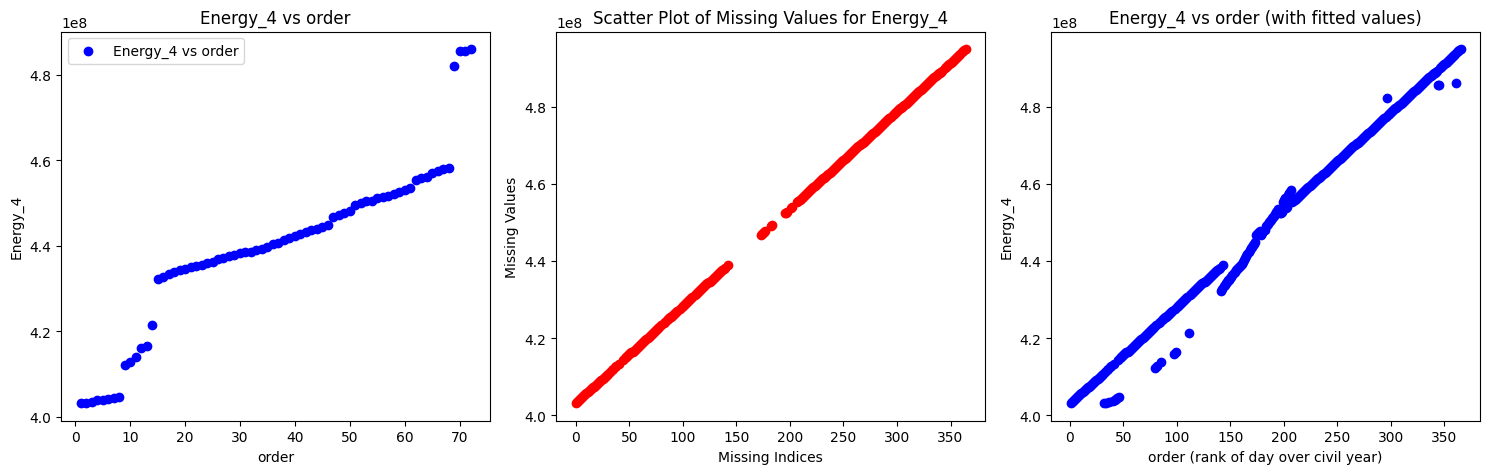

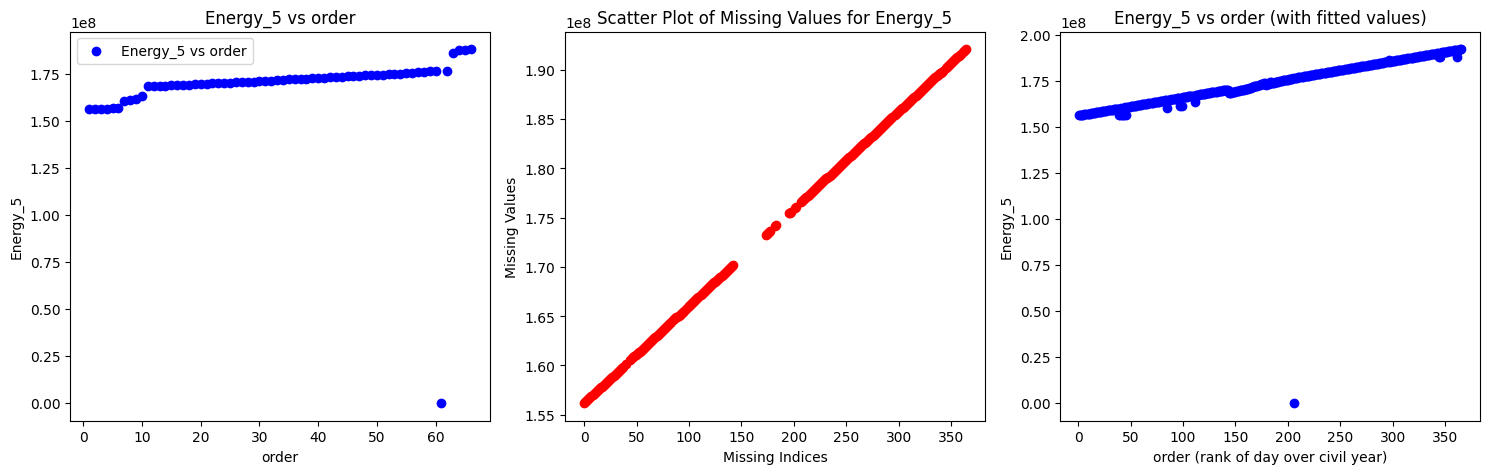

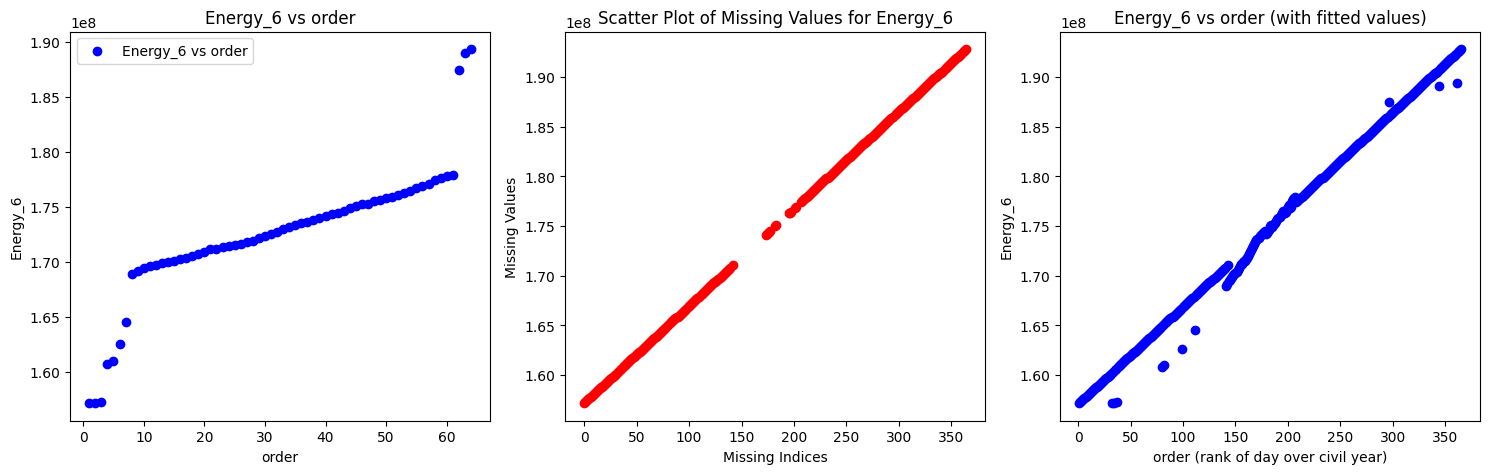

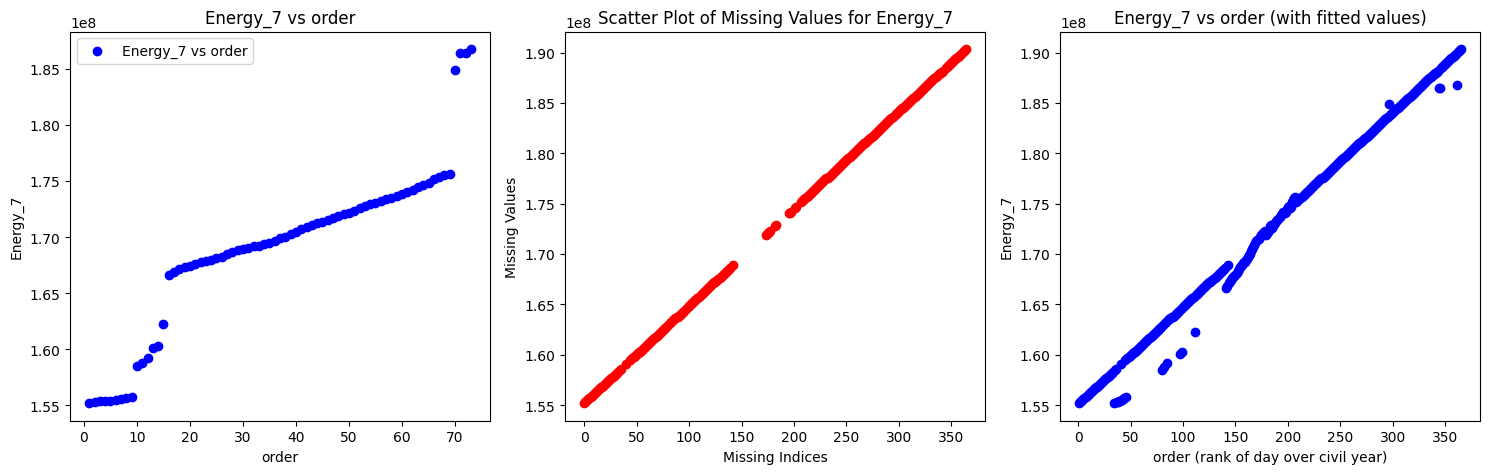

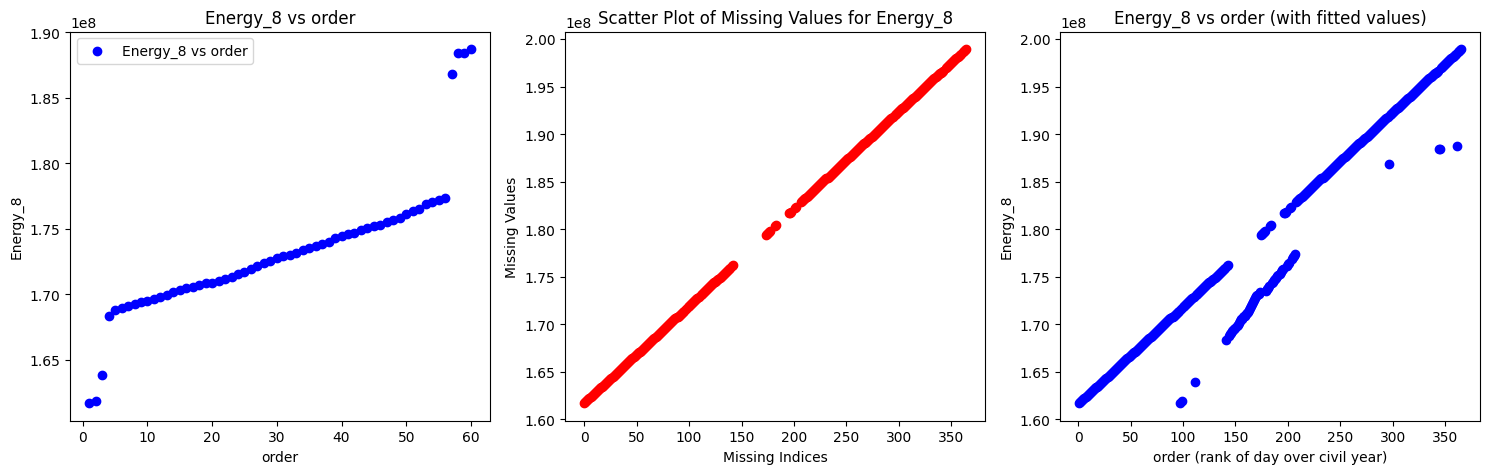

In [36]:
def fill_energy_column(column_name, merged_data):
    order_values = merged_data['order']
    energy_values = merged_data[column_name].dropna().astype(int)

    # Find non-null first element
    first_non_null_index = energy_values.first_valid_index()
    first_non_null_order = merged_data.loc[first_non_null_index, 'order']
    first_non_null_value = merged_data.loc[first_non_null_index, column_name]

    # Find non-null last element
    last_non_null_index = energy_values.last_valid_index()
    last_non_null_order = merged_data.loc[last_non_null_index, 'order']
    last_non_null_value = merged_data.loc[last_non_null_index, column_name]

    w0 = (last_non_null_value - first_non_null_value) / (last_non_null_order - first_non_null_order)
    b0 = first_non_null_value

    energy_values, order_values = zip(*list(zip(energy_values, order_values)))

    df = pd.DataFrame(list(zip(energy_values, order_values)), columns=['Column_1', 'Column_2'])
    x = df['Column_2'].values
    y = df['Column_1'].values

    theta = jnp.array([w0, b0])

    def model(theta, x):
        w, b = theta
        return w * x + b

    def loss_fn(theta, x, y):
        prediction = model(theta, x)
        return jnp.mean(jnp.abs(prediction - y))

    def update(theta, x, y, lr=0.1):
        grad = jax.grad(loss_fn)(theta, x, y)
        return theta - lr * grad

    num_epochs = 100
    learning_rate = 0.01
    for _ in range(num_epochs):
        theta = update(theta, x, y, lr=learning_rate)

    w, b = theta

    missing_indices = np.where(merged_data[column_name].isna())[0]
    missing_values = w * missing_indices + b
    merged_data.loc[merged_data.index[missing_indices], column_name] = missing_values

    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    axes[0].scatter(order_values, energy_values, color='blue', label=f'{column_name} vs order')
    axes[0].set_xlabel('order')
    axes[0].set_ylabel(column_name)
    axes[0].set_title(f'{column_name} vs order')
    axes[0].legend()

    axes[1].scatter(missing_indices, missing_values, color='red')
    axes[1].set_xlabel('Missing Indices')
    axes[1].set_ylabel('Missing Values')
    axes[1].set_title(f'Scatter Plot of Missing Values for {column_name}')

    axes[2].scatter(merged_data['order'], merged_data[column_name], color='blue')
    axes[2].set_xlabel('order (rank of day over civil year)')
    axes[2].set_ylabel(column_name)
    axes[2].set_title(f'{column_name} vs order (with fitted values)')

    plt.tight_layout()
    plt.show()

# Apply the function to each column
energy_columns = ['Energy_1','Energy_2', 'Energy_3', 'Energy_4','Energy_5','Energy_6','Energy_7','Energy_8']
for column_name in energy_columns:
    fill_energy_column(column_name, merged_data)

B. **Dealing the outliers**

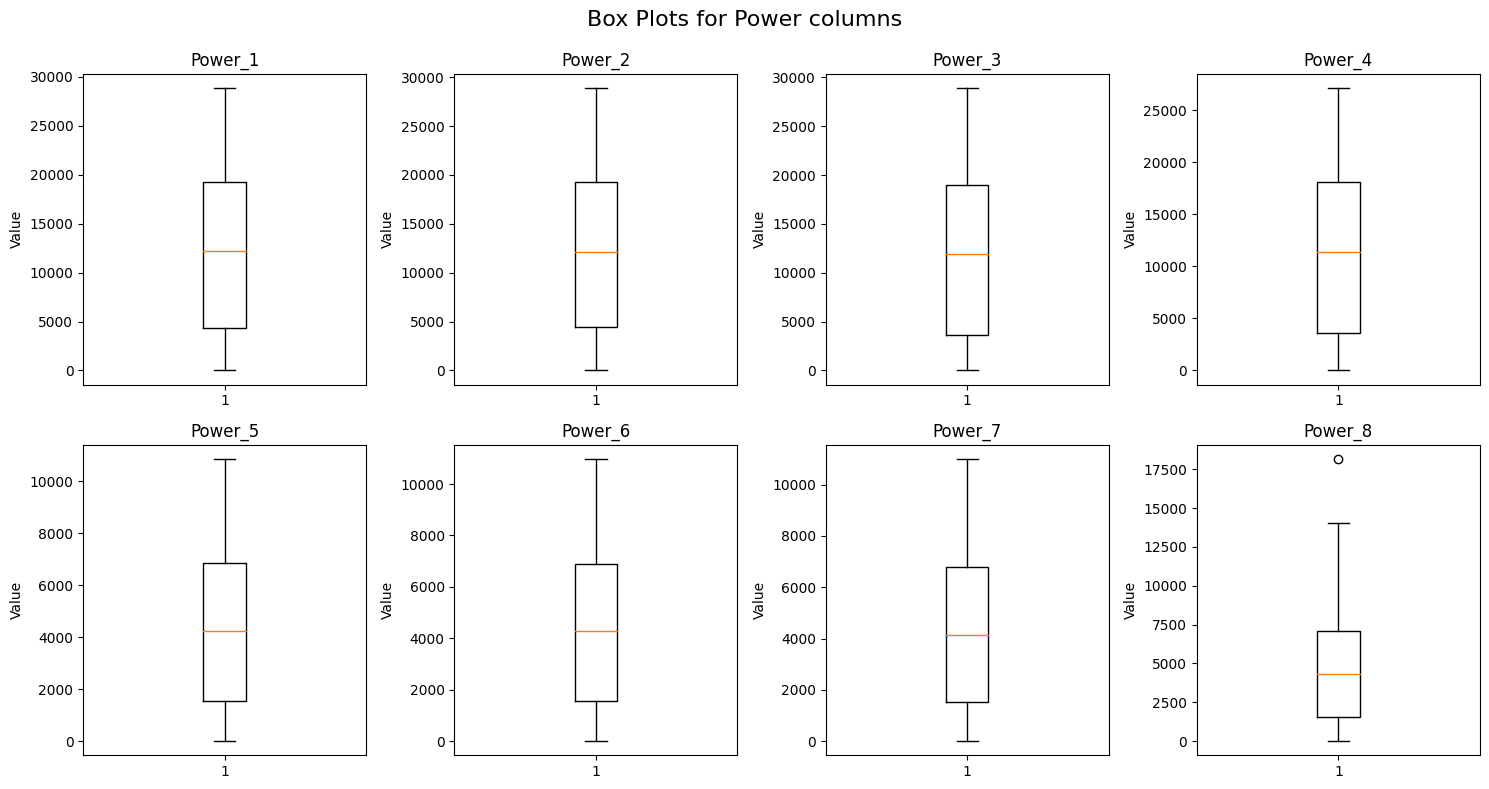

In [37]:
fig, axes = plt.subplots(2, 4, figsize=(15, 8))
fig.suptitle('Box Plots for Power columns', fontsize=16)

axes = axes.flatten()

for i, col in enumerate(power_columns):
    ax = axes[i]
    ax.boxplot(merged_data[col])
    ax.set_title(col)
    ax.set_ylabel('Value')

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

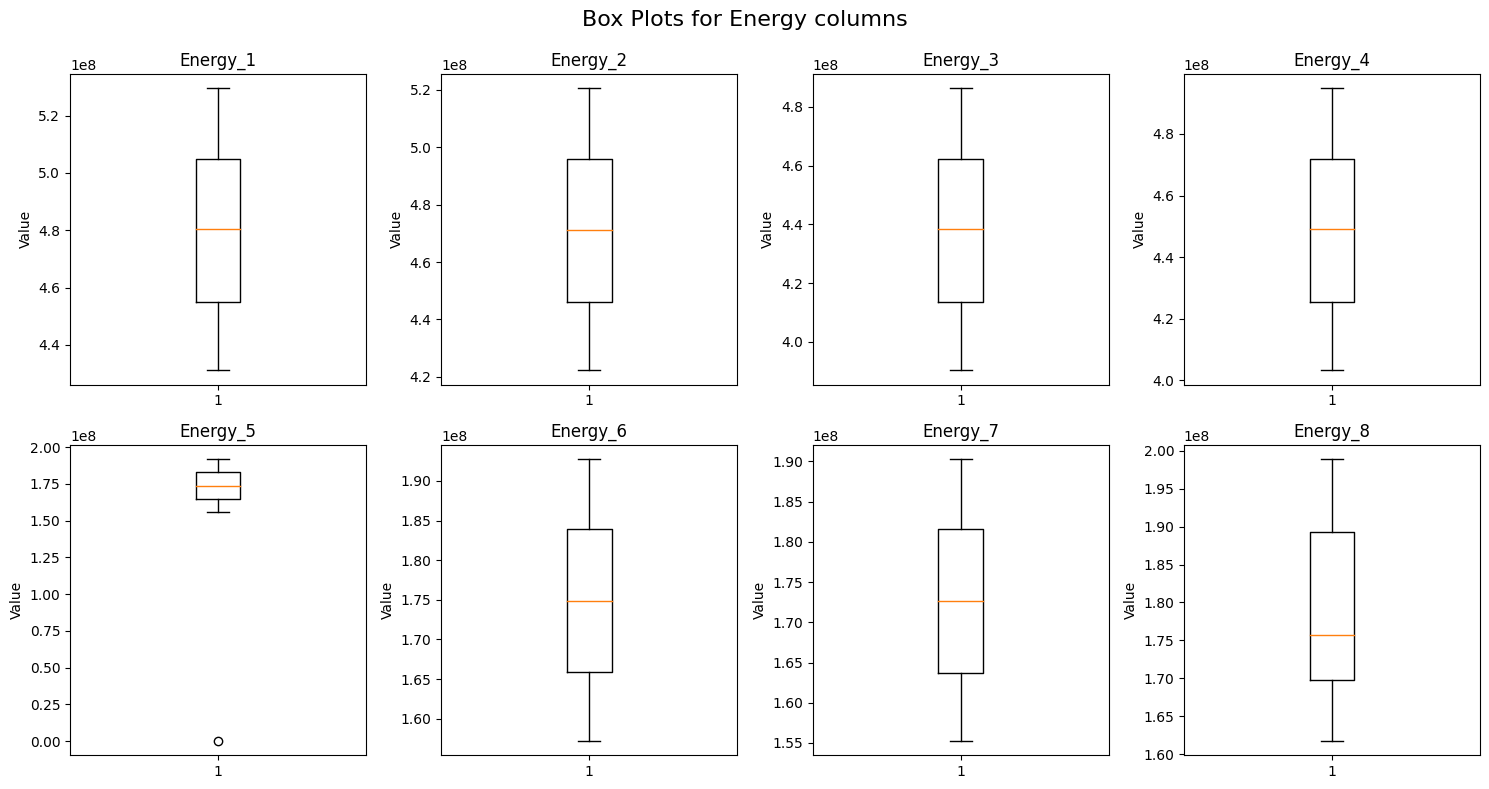

In [38]:
fig, axes = plt.subplots(2, 4, figsize=(15, 8))
fig.suptitle('Box Plots for Energy columns', fontsize=16)
axes = axes.flatten()

for i, col in enumerate(energy_columns):
    ax = axes[i]
    ax.boxplot(merged_data[col])
    ax.set_title(col)
    ax.set_ylabel('Value')

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

There are not outliers in the features related to energy and power, only on Energy_5 feature and Power_8(one outlier). But previously, we have seen outliers in the features provided from weather data set. So, we should drop them.

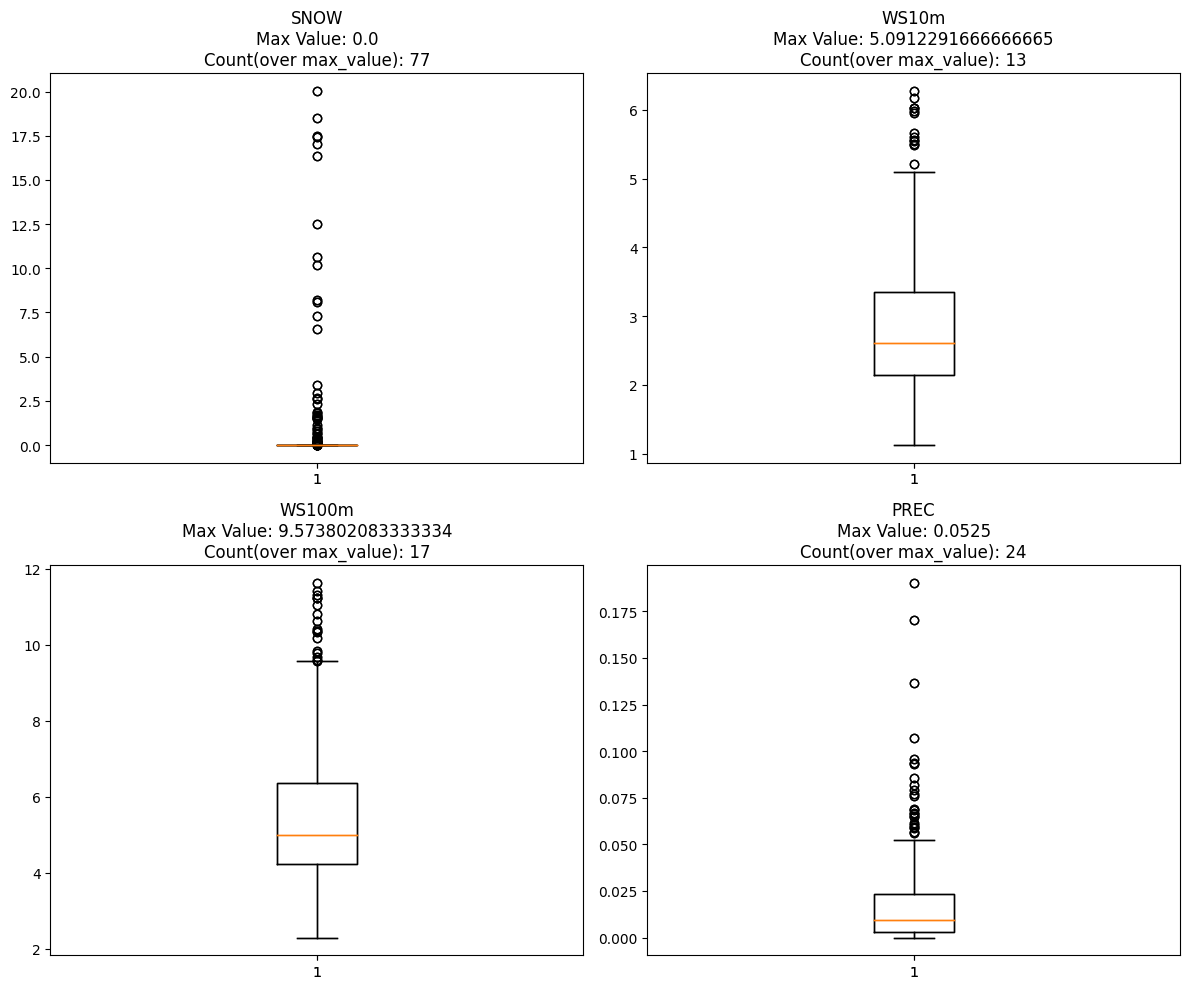

In [39]:
variables = ['SNOW', 'WS10m', 'WS100m', 'PREC']

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
for i, variable in enumerate(variables):
    # Calculate max value
    bp = axes[i//2, i%2].boxplot(merged_data[variable])
    max_value = bp['whiskers'][1].get_ydata()[1]

    # Get values larger than max
    values_greater_than_max = merged_data[variable][merged_data[variable] > max_value]

    # Count values
    count_values_greater_than_max = len(values_greater_than_max)

    # Plot the box plot
    axes[i//2, i%2].boxplot(merged_data[variable])
    axes[i//2, i%2].set_title(f'{variable}\nMax Value: {max_value}\nCount(over max_value): {count_values_greater_than_max}')

plt.tight_layout()
plt.show()

Regarding the outliers in the WS10m, WS100m and PREC box plots will drop the observations related to them by computing the upper and lower bounds for identifying potential outliers using the Interquartile Range (IQR) method.
As the variation in the SNOW feature is too small, we will abandon the SNOW  feature.

In [40]:
# Drop 'SNOW' and 'order' variables
merged_data = merged_data.drop(['SNOW', 'order'], axis=1)

In [41]:
columns_of_interest = ['PREC', 'WS100m', 'WS10m', 'Energy_5', 'Power_8']

for column in columns_of_interest:
    IQR = merged_data[column].quantile(0.75) - merged_data[column].quantile(0.25)
    upper = merged_data[column].quantile(0.75) + (IQR * 1.5)
    lower = merged_data[column].quantile(0.25) - (IQR * 1.5)

    merged_data = merged_data[(merged_data[column] <= upper) & (merged_data[column] >= lower)]

merged_data.reset_index(drop=True, inplace=True)

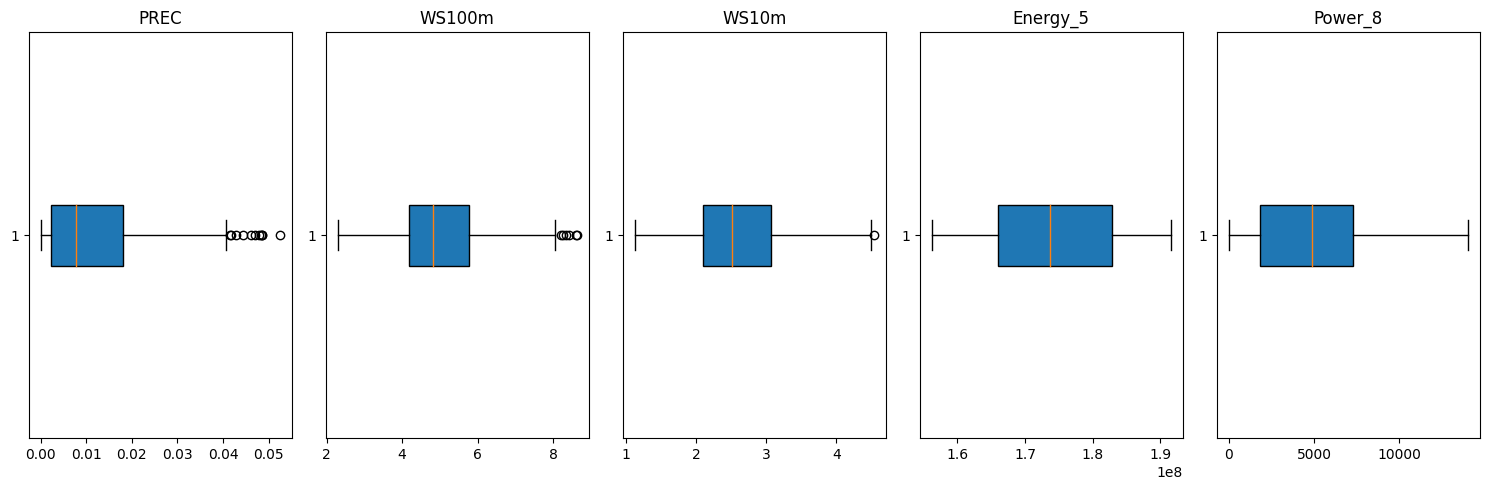

In [42]:
columns_of_interest = ['PREC', 'WS100m', 'WS10m', 'Energy_5', 'Power_8']
fig, axes = plt.subplots(nrows=1, ncols=len(columns_of_interest), figsize=(15, 5))

for i, column in enumerate(columns_of_interest):
    axes[i].boxplot(merged_data[column], vert=False, patch_artist=True)
    axes[i].set_title(column)

plt.tight_layout()
plt.show()

In the PREC, WS100m and WS10m box plots, we again see the small circles outside the extreme bars, and they are therefore not considered as outliers.. This is due to the fact that the corresponding distributions are asymmetrical, since the right half of a median is larger than the left half of a median for each box plot.

In [43]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SWD       322 non-null    float64
 1   CU        322 non-null    float64
 2   CM        322 non-null    float64
 3   CD        322 non-null    float64
 4   TT2M      322 non-null    float64
 5   ST        322 non-null    float64
 6   RH2m      322 non-null    float64
 7   WS10m     322 non-null    float64
 8   WS100m    322 non-null    float64
 9   PREC      322 non-null    float64
 10  Power_1   322 non-null    float64
 11  Power_2   322 non-null    float64
 12  Power_3   322 non-null    float64
 13  Power_4   322 non-null    float64
 14  Power_5   322 non-null    float64
 15  Power_6   322 non-null    float64
 16  Power_7   322 non-null    float64
 17  Power_8   322 non-null    float64
 18  Energy_1  322 non-null    float64
 19  Energy_2  322 non-null    float64
 20  Energy_3  322 non-null    float6

One can see in merged_data.info() how the number of observations has decreased in the data set. We have now 321 observation in the merged data set.

<div class="alert alert-success">
    
**Exercise**. Compute descriptive or summary statistics of each individual column of the dataset. Comment on the results.
    
</div>

In [44]:
summary_stats = merged_data.describe()
print(summary_stats)

              SWD          CU          CM          CD        TT2M          ST  \
count  322.000000  322.000000  322.000000  322.000000  322.000000  322.000000   
mean   155.844944    0.235742    0.119108    0.270292   11.730636   11.730636   
std     98.294043    0.177335    0.121987    0.257772    7.414202    7.414202   
min     11.912052    0.000000    0.000000    0.000000   -5.087385   -5.087385   
25%     60.063844    0.088318    0.022979    0.069372    5.253778    5.253778   
50%    158.699564    0.187312    0.081271    0.184932   11.855469   11.855469   
75%    247.550513    0.355025    0.174818    0.407345   18.015141   18.015141   
max    328.829177    0.741760    0.557604    0.984542   29.101678   29.101678   

             RH2m       WS10m      WS100m        PREC  ...       Power_7  \
count  322.000000  322.000000  322.000000  322.000000  ...    322.000000   
mean    76.040590    2.632543    5.056579    0.011948  ...   4603.395172   
std     15.634201    0.685227    1.309464 

 Features such as CU, CM and CD have relatively modest standard deviations (between approximately 0.176 and 0.256). This indicates that the values of these  features are not widely dispersed around the mean, which suggests a certain stability in the observations.

The features TT2M, ST, RH2m, WS10m, WS100m have slightly higher standard deviations (between approximately 7.426 and 15.758). This suggests that the values in these features have a more noticeable dispersion in relation to the mean.

The PREC features and the energy-related features (Power_1 to Energy_8) have standard deviations that vary considerably.This is correct, since the values of these observations increase throughout the year.

<div class="alert alert-success">
    
**Exercise**. Analyze and visualize the pairwise correlations between the columns of the dataset.

In particular, comment on the correlation between the weather conditions and the solar power production.
    
</div>

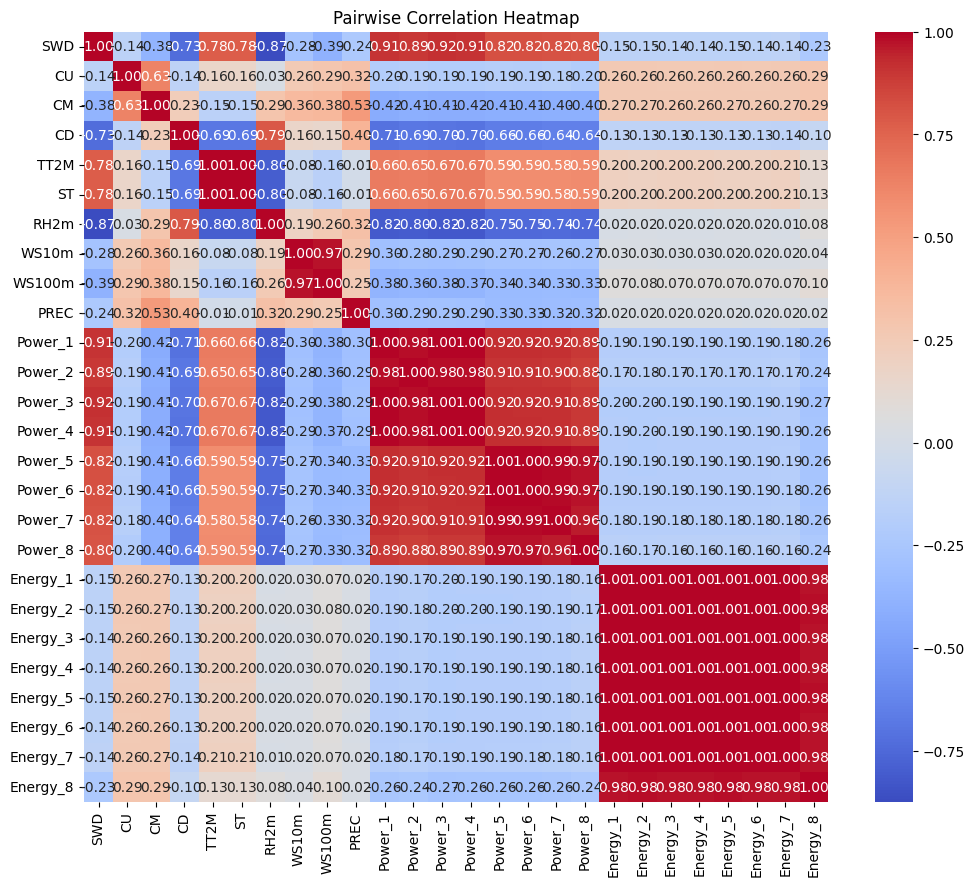

In [45]:
correlation_matrix = merged_data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Pairwise Correlation Heatmap')
plt.show()

The power and energy features are highly positively correlated with each other, as expected: WS10m and WS100m, and ST and TT2M, TT2M and RH2M. We also observed a predominantly negative correlation between weather-related features and power-related features, such as Power_1 and CD, which is logical since the lower the clouds, the less power is gained, for example. Or between power  features (e.g. Power_1 and RH2m), Air humidity can affect the performance of solar panels. The higher the humidity, the less efficient the solar panels are at producing solar power. We can also see that the TT2M or ST features have a positive influence on the Power  features. The higher their values, the greater the gain in power. Also, The SWD  feature, which represents the total amount of solar energy received per unit area, has a positive impact on all power-related features as we can see over the high correlation values between them, and a slightly lesser impact on energy-related features.

Others are also strongly negatively correlated, such as the power  features and RH2M or CD.Basically, our data set contains redundant information.

<div class="alert alert-success">
    
**Exercise**. Visualize and compare the evolution of the daily production data and the daily solar irradiance data over the year. Comment on the results.
    
</div>

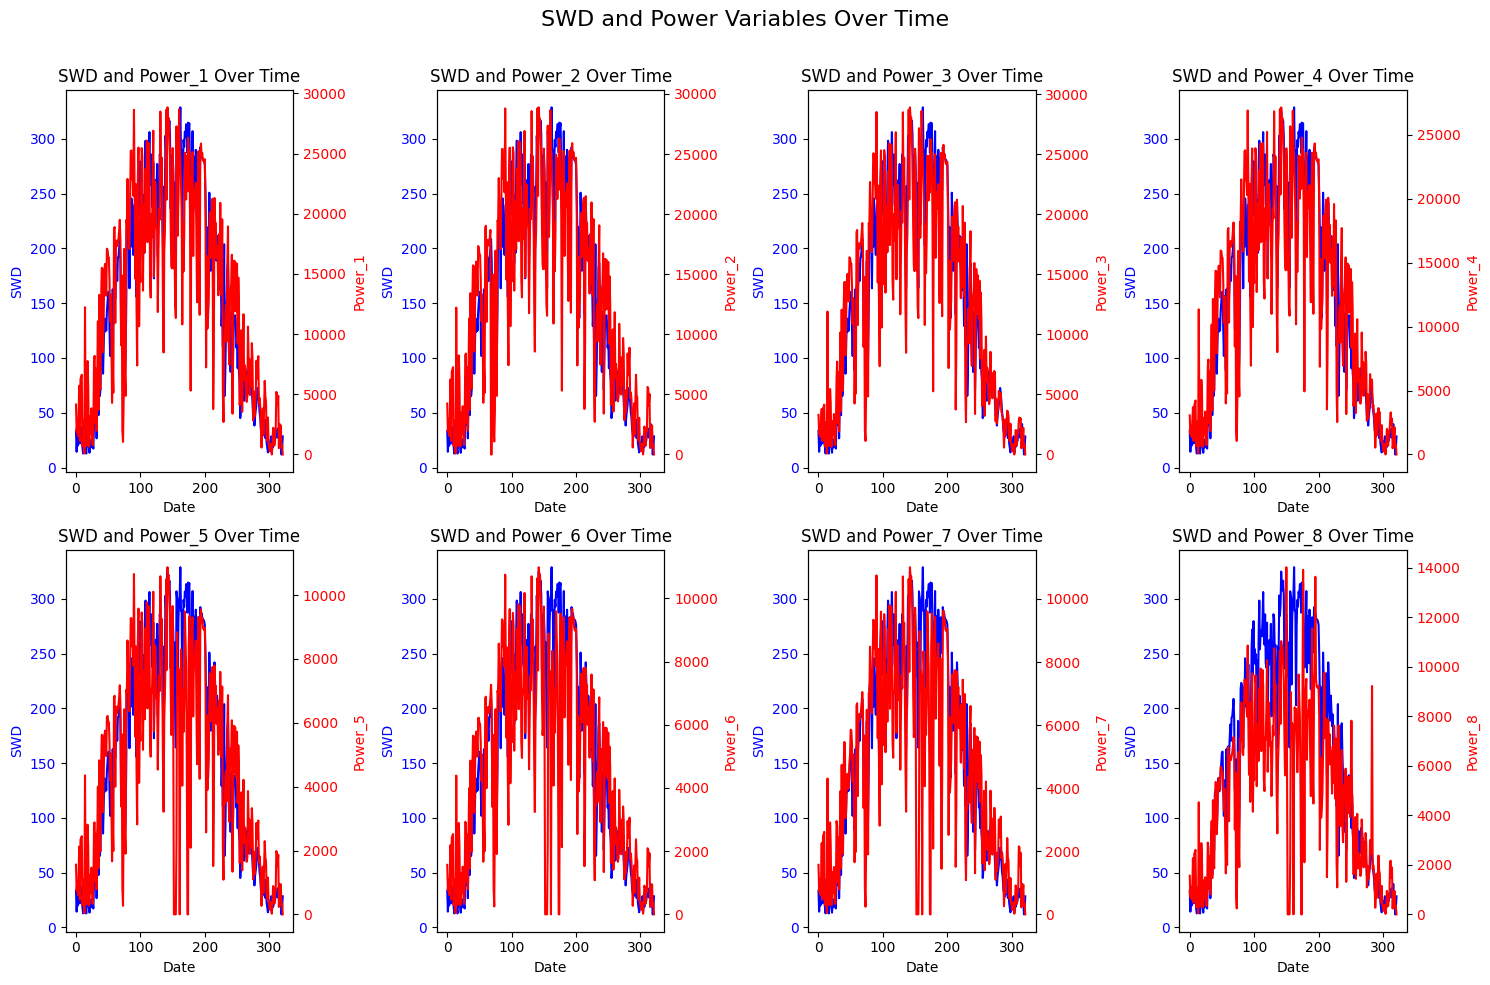

In [46]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 10))
fig.suptitle('SWD and Power Variables Over Time', fontsize=16)

axes = axes.flatten()

for i, power_col in enumerate(power_columns):
    ax = axes[i]

    ax.plot(merged_data.index, merged_data['SWD'], color='blue', label='SWD')
    ax.set_xlabel('Date')
    ax.set_ylabel('SWD', color='blue')
    ax.tick_params(axis='y', labelcolor='blue')

    ax2 = ax.twinx()
    ax2.plot(merged_data.index, merged_data[power_col], color='red', label=power_col)
    ax2.set_ylabel(power_col, color='red')
    ax2.tick_params(axis='y', labelcolor='red')

    ax.set_title(f'SWD and {power_col} Over Time')

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

One can see the evolution of SWD feature is similar as the one of solar power. This also means that solar energy also depends on the efficiency of solar panels since the two curves do not evolve in the same way in the different scatter plots. At certain times of the year, solar panels capture more energy than others. As we can see, during the summer of 2022 (corresponding to the interval [200 days; 270 days ], they operate at maximum capacity (very well), generating very good solar power production at the same time. In fact, this is the hottest time of the year (barring climate change). We can also see that when we are at the end of the calendar year (late autumn), at the beginning of winter ([300 days; 365 days] and at the beginning of the year (always winter) they are less efficient, hence the decrease in solar power production. The evolution of Power_8 feature present certain anormaly due to the fact the evolution of SWD feature is obviously higher than the evolution of solar power production.What's more, their development is highly unstable.

<div class="alert alert-success">
    
**Exercise**. Visualize the evolution of the distribution of the solar power production over the course of a day. What can you say about the shape and spread of the distributions?
    
</div>

In [47]:
['Power_1', 'Power_2', 'Power_3', 'Power_4', 'Power_5', 'Power_6', 'Power_7', 'Power_8']
power_data = solar_data[power_columns]

# Resample the power data to hourly intervals and calculate the mean
hourly_power_data = power_data.resample('H').mean()

In [48]:
hourly_power_data.tail(3)

,Power_1,Power_2,Power_3,Power_4,Power_5,Power_6,Power_7,Power_8
DateTime,,,,,,,,
2022-12-31 20:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-12-31 21:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-12-31 22:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


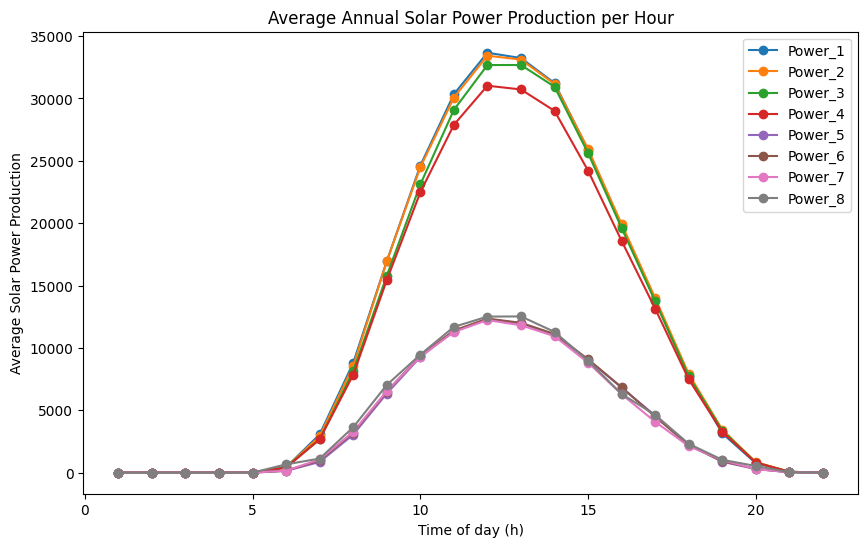

In [49]:
hourly_avg_annual = hourly_power_data.groupby(hourly_power_data.index.hour).mean()

fig, ax = plt.subplots(figsize=(10, 6))
hourly_avg_annual.plot(ax=ax, marker='o')
plt.xlabel('Time of day (h)')
plt.ylabel('Average Solar Power Production')
plt.title('Average Annual Solar Power Production per Hour')

plt.show()

The distribution of solar power is most interesting between 10am and 3pm. This is normal, since the sun rises usually at around 6 am  per  and sets at around 8pm (at certain year time). Maximum production occurs between [11am ; 3pm], as shown in the diagram. Power_1 and Power_2 panels produce the most solar power during the year according to the plot. Finally, the distribution from Power_1 to Power_8 is similar, with Power_1 being the most important of all, resembling a normal distribution.

<div class="alert alert-success">
    
**Exercise**. Visualize the evolution of the distribution of the solar power production over the course of a day, for each month. What can you say about the shape and spread of the distributions?
    
</div>

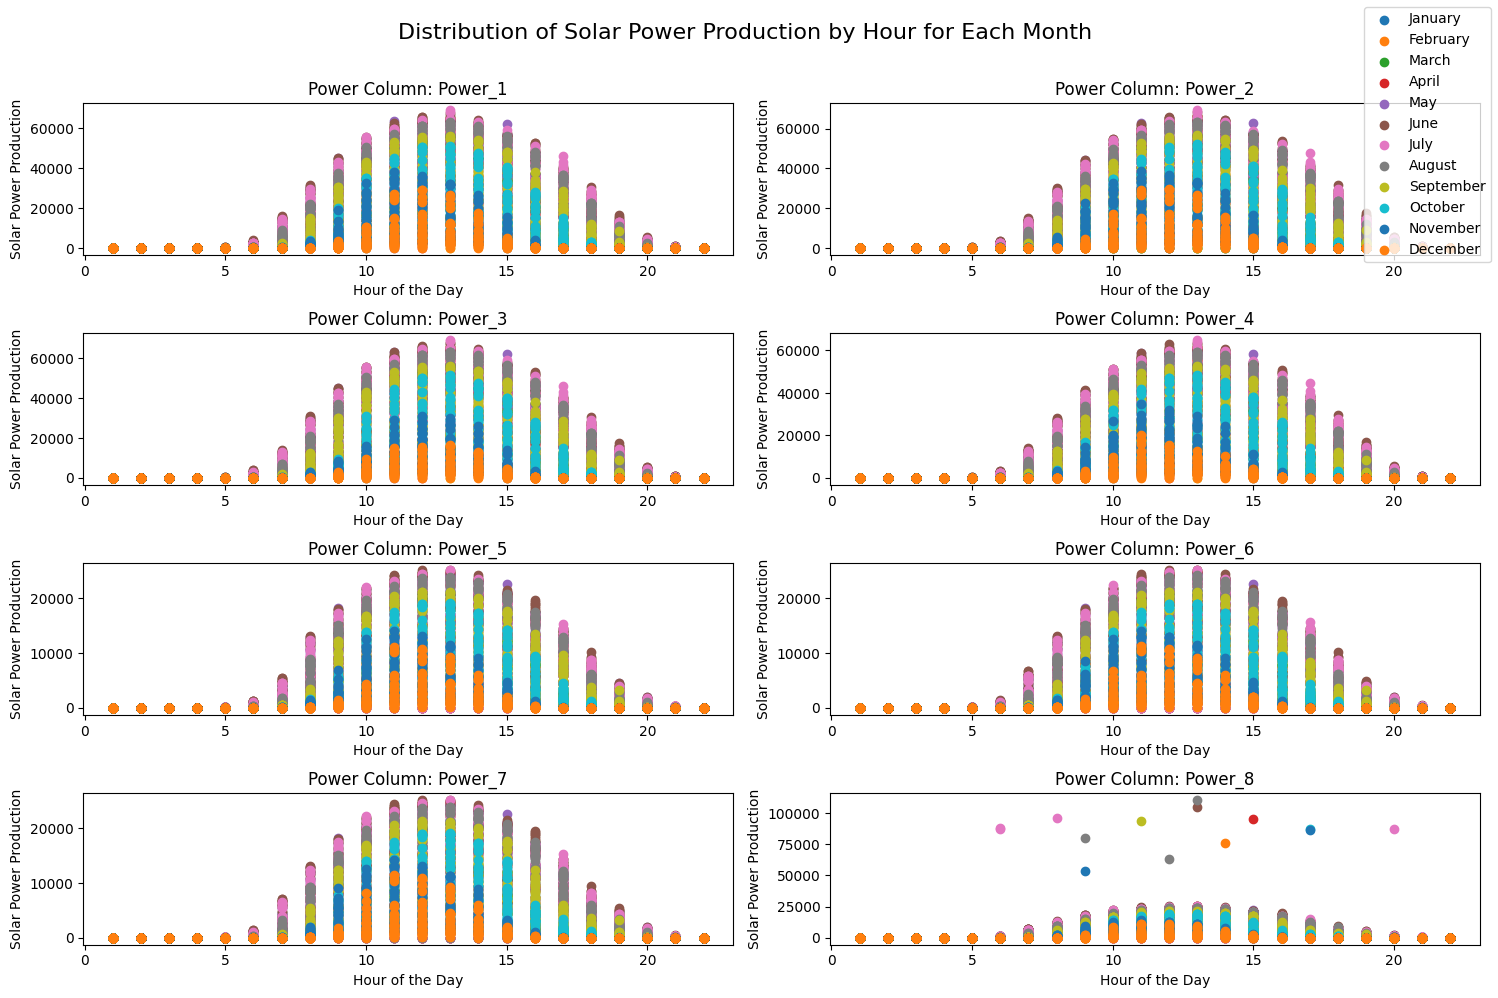

In [50]:
hourly_power_data['Hour'] = hourly_power_data.index.hour
hourly_power_data['Month'] = hourly_power_data.index.month

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 10))
fig.suptitle('Distribution of Solar Power Production by Hour for Each Month', fontsize=16)

# Iterate through each power column
for power_col, ax in zip(power_columns, axes.flatten()):
    # Iterate through each month
    for month in hourly_power_data['Month'].unique():
        data = hourly_power_data[hourly_power_data['Month'] == month]
        ax.scatter(data['Hour'], data[power_col], label=calendar.month_name[month])
        ax.set_xlabel('Hour of the Day')
        ax.set_ylabel('Solar Power Production')
        ax.set_title(f'Power Column: {power_col}')

# Add a single legend for all the subplots
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')

# Remove unused subplots
for i in range(len(power_columns), len(axes.flatten())):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

The interpretation is similar to the previous question. As shown by the pink, brown and grey dots representing the months of July, June and August respectively, solar energy production is highest in the daily interval between ]11am ; 3pm[, and lowest in the months of January, December and November, represented by the yellow and blue dots. Power 8 panel is less productive than all the others. Here again, the distribution of each power resembles a normal distribution. Clearly, the Power_8 panel presents anomalies compared with the other panels, as it has some higher solar energy production values than the others. Panels 1 to 4 are the most productive, while panels 5 to 8 are the least productive.